## Business Understanding

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.  

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:  
1. If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
2. If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a      financial loss for the company.

 

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

**The client with payment difficulties:** he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,  
**All other cases:** All other cases when the payment is paid on time.

When a client applies for a loan, there are four types of decisions that could be taken by the client/company:  

**Approved:** The Company has approved loan Application  
**Cancelled:** The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.  
**Refused:** The company had rejected the loan (because the client does not meet their requirements etc.\.  
**Unused offer:**  Loan has been cancelled by the client but on different stages of the process.



## Business Objectives

This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough).

# ANALYSIS OF APPLICATION DATA

### Import required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option("display.max_columns", None)

## Inspecting the data 

In [3]:
df = pd.read_csv('application_data.csv')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
df.shape

(307511, 122)

In [5]:
#columns information and ther types
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [6]:
#statistical info about numerical columns
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

#### Dropping 50% of Null values

In [7]:
#check for percentage of null values
round((df.isnull().sum()/len(df)*100).sort_values(ascending = False),2)

COMMONAREA_MEDI             69.87
COMMONAREA_AVG              69.87
COMMONAREA_MODE             69.87
NONLIVINGAPARTMENTS_MODE    69.43
NONLIVINGAPARTMENTS_AVG     69.43
                            ...  
NAME_HOUSING_TYPE            0.00
NAME_FAMILY_STATUS           0.00
NAME_EDUCATION_TYPE          0.00
NAME_INCOME_TYPE             0.00
SK_ID_CURR                   0.00
Length: 122, dtype: float64

In [8]:
#remove columns that have null values greater than 50% and store in new dataframe
application_data = df.dropna(axis=1, thresh = len(df) * 0.5)

In [9]:
#check if columns having null values greater than 50% are removed or not
round((application_data.isnull().sum()/len(application_data)*100).sort_values(ascending = False),2).head(20)

FLOORSMAX_AVG                   49.76
FLOORSMAX_MODE                  49.76
FLOORSMAX_MEDI                  49.76
YEARS_BEGINEXPLUATATION_AVG     48.78
YEARS_BEGINEXPLUATATION_MODE    48.78
YEARS_BEGINEXPLUATATION_MEDI    48.78
TOTALAREA_MODE                  48.27
EMERGENCYSTATE_MODE             47.40
OCCUPATION_TYPE                 31.35
EXT_SOURCE_3                    19.83
AMT_REQ_CREDIT_BUREAU_YEAR      13.50
AMT_REQ_CREDIT_BUREAU_HOUR      13.50
AMT_REQ_CREDIT_BUREAU_DAY       13.50
AMT_REQ_CREDIT_BUREAU_WEEK      13.50
AMT_REQ_CREDIT_BUREAU_MON       13.50
AMT_REQ_CREDIT_BUREAU_QRT       13.50
NAME_TYPE_SUITE                  0.42
DEF_30_CNT_SOCIAL_CIRCLE         0.33
OBS_60_CNT_SOCIAL_CIRCLE         0.33
DEF_60_CNT_SOCIAL_CIRCLE         0.33
dtype: float64

## Dropping columns

In [10]:
#Drop duplicate rows
application_data.drop_duplicates()
application_data.shape

(307511, 81)

**Inference:**  No duplicate rows found

In [11]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


On extensive research it can be found that some columns dont play any role in the analysis, those are 
EXT_SOURCE_2, EXT_SOURCE_3, YEARS_BEGINEXPLUATATION_AVG, FLOORSMAX_AVG, YEARS_BEGINEXPLUATATION_MODE, FLOORSMAX_MODE, 
YEARS_BEGINEXPLUATATION_MEDI, FLOORSMAX_MEDI, TOTALAREA_MODE, EMERGENCYSTATE_MODE 

In [12]:
#removing unimportant columns
application_data.drop(labels = ['EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG', 
                      'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 
                      'FLOORSMAX_MEDI', 'TOTALAREA_MODE', 'EMERGENCYSTATE_MODE'], axis = 1, inplace = True)

In [13]:
#remove FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_PHONE from the new data frame because we already have FLAG_MOBILE attribute 
#which tells us about whether the client provided mobile phone number or not and we also have FLAG_CONT_MOBILE atribute which tells 
#whether the phone was reachable or not.

In [14]:
#drop columns
application_data.drop(labels = ['FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE'], axis = 1, inplace = True)

In [15]:
#check shape of the dataframe
application_data.shape

(307511, 68)

## Handling Missing values

In [16]:
#display all columns with null values
with pd.option_context('display.max_rows', None,):
    print(application_data.isnull().sum())

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_CONT_MOBILE                   0
FLAG_EMAIL                         0
OCCUPATION_TYPE                96391
CNT_FAM_MEMBERS                    2
REGION_RATING_CLIENT               0
R

#### Handling OCCUPATION_TYPE column

In [17]:
# check percentage of null values
application_data.OCCUPATION_TYPE.value_counts(normalize=True, dropna = False)

NaN                      0.313455
Laborers                 0.179460
Sales staff              0.104393
Core staff               0.089655
Managers                 0.069497
Drivers                  0.060495
High skill tech staff    0.037007
Accountants              0.031911
Medicine staff           0.027762
Security staff           0.021856
Cooking staff            0.019336
Cleaning staff           0.015131
Private service staff    0.008624
Low-skill Laborers       0.006806
Waiters/barmen staff     0.004384
Secretaries              0.004244
Realty agents            0.002442
HR staff                 0.001831
IT staff                 0.001711
Name: OCCUPATION_TYPE, dtype: float64

As OCCUPATION_TYPE is a categorical variable it is suggested to impute the missing values with mode, but we won't be doing that because it may lead to over representation of the the frequent label as frequency of NaN is highest in the column. Rather we will replace it with another word 'Missing'.

In [18]:
#replace Nan with 'Missing'
application_data.OCCUPATION_TYPE.fillna('Missing', inplace = True)

In [19]:
#re-check the column if the values are imputed or not
application_data.OCCUPATION_TYPE.value_counts()

Missing                  96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

#### Handling columns : AMT_REQ_CREDIT_BUREAU_YEAR, AMT_REQ_CREDIT_BUREAU_QRT,
####                        AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_DAY,       
####                        AMT_REQ_CREDIT_BUREAU_HOUR 

In [20]:
amt = ['AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_QRT',
'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_DAY',
'AMT_REQ_CREDIT_BUREAU_HOUR']

###### check the statistical description of these columns

In [21]:
application_data.AMT_REQ_CREDIT_BUREAU_HOUR.describe()

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [22]:
application_data.AMT_REQ_CREDIT_BUREAU_WEEK.describe()

count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

In [23]:
application_data.AMT_REQ_CREDIT_BUREAU_MON.describe()

count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [24]:
application_data.AMT_REQ_CREDIT_BUREAU_QRT.describe()

count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [25]:
application_data.AMT_REQ_CREDIT_BUREAU_YEAR.describe()

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [26]:
application_data.AMT_REQ_CREDIT_BUREAU_DAY.describe()

count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

From the above statistical descriptions we can infer, it is safe to impute the missing values with median value

In [27]:
#replace missing values with median
for i in amt:
    application_data[i].fillna(application_data[i].median(), inplace = True)

In [28]:
# re-check for missing values
application_data[amt].isnull().sum()

AMT_REQ_CREDIT_BUREAU_YEAR    0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_HOUR    0
dtype: int64

#### Handling NAME_TYPE_SUITE

In [29]:
#check number of null values
application_data.NAME_TYPE_SUITE.value_counts(dropna = False)

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
NaN                  1292
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

As we have no data about who was accompanying the client during applying loan, we can replace the missing values with the word 'Missing'

In [30]:
#replace NaN with 'Missing'
application_data.NAME_TYPE_SUITE.fillna('Missing', inplace=True)

In [31]:
#recheck for missing values
application_data.NAME_TYPE_SUITE.isnull().sum()

0

In [32]:
application_data.isna().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 68, dtype: int64

#### Handling OBS_30_CNT_SOCIAL_CIRCLE,  DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE

In [33]:
obs = ['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']

######  check the statistical descriptions of these columns

In [34]:
application_data.OBS_30_CNT_SOCIAL_CIRCLE.describe()

count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [35]:
application_data.OBS_60_CNT_SOCIAL_CIRCLE.describe()

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [36]:
application_data.DEF_30_CNT_SOCIAL_CIRCLE.describe()

count    306490.000000
mean          0.143421
std           0.446698
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [37]:
application_data.DEF_60_CNT_SOCIAL_CIRCLE.describe()

count    306490.000000
mean          0.100049
std           0.362291
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

From the above statistical descriptions we can infer, it is safe to impute the missing values with median value

In [38]:
#replace missing values with median
for i in obs:
    application_data[i].fillna(application_data[i].median(), inplace = True)

In [39]:
#recheck for missing values
application_data[obs].isnull().sum()

OBS_30_CNT_SOCIAL_CIRCLE    0
DEF_30_CNT_SOCIAL_CIRCLE    0
OBS_60_CNT_SOCIAL_CIRCLE    0
DEF_60_CNT_SOCIAL_CIRCLE    0
dtype: int64

#### Handling AMT_GOODS_PRICE

###### Inspect the column

In [40]:
application_data.AMT_GOODS_PRICE.head()

0     351000.0
1    1129500.0
2     135000.0
3     297000.0
4     513000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [41]:
application_data.AMT_GOODS_PRICE.describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [42]:
#check for the percentage of null values
application_data.AMT_GOODS_PRICE.isnull().sum()/len(application_data)*100

0.09040327012692229

As the percentage of missing values is very less, the missing values can be imputed with mean or median. We will choose median to avoid the effect of outlier

In [43]:
#impute the missing values with median
application_data.AMT_GOODS_PRICE.fillna(application_data.AMT_GOODS_PRICE.median(), inplace = True)

#### Handling AMT_ANNUITY

###### Inspect the column

In [44]:
application_data.AMT_ANNUITY.head()

0    24700.5
1    35698.5
2     6750.0
3    29686.5
4    21865.5
Name: AMT_ANNUITY, dtype: float64

In [45]:
application_data.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [46]:
#check for the percentage of null values
application_data.AMT_ANNUITY.isnull().sum()/len(application_data)*100

0.003902299429939092

We impute the missing values with median to avoid the effect of outlier

In [47]:
#impute the missing values with median
application_data.AMT_ANNUITY.fillna(application_data.AMT_ANNUITY.median(), inplace = True)

#### Handling CNT_FAM_MEMBERS

###### Inspect the column

In [48]:
application_data.CNT_FAM_MEMBERS.value_counts(dropna = False)

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
NaN          2
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [49]:
application_data.CNT_FAM_MEMBERS.describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

As we can see difference between 75% percentile and max is very much high, which tells that this column contain outliers.
So it is better to impute the missing values with median

In [50]:
#impute the missing values with median
application_data.CNT_FAM_MEMBERS.fillna(application_data.CNT_FAM_MEMBERS.median(), inplace = True)

#### Handling DAYS_LAST_PHONE_CHANGE

###### Inspect the column

In [51]:
application_data.DAYS_LAST_PHONE_CHANGE.describe()

count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

We impute the missing values with median to avoid the effect of outlier

In [52]:
#impute the missing values with median
application_data.DAYS_LAST_PHONE_CHANGE.fillna(application_data.DAYS_LAST_PHONE_CHANGE.median(), inplace = True)

In [53]:
#check for the missing values in whole dataset
with pd.option_context('display.max_rows', None,):
    print(application_data.isnull().sum())

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_CONT_MOBILE               0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION

## Modifying the data

In [54]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_CONT_MOBILE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


As we can see, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH and DAYS_LAST_PHONE_CHANGE are in negative values. We need to convert them into positive values

In [55]:
#change days to their absolute value
application_data.DAYS_BIRTH = abs(application_data.DAYS_BIRTH)
application_data.DAYS_EMPLOYED = abs(application_data.DAYS_EMPLOYED)
application_data.DAYS_REGISTRATION = abs(application_data.DAYS_REGISTRATION)
application_data.DAYS_ID_PUBLISH = abs(application_data.DAYS_ID_PUBLISH)
application_data.DAYS_LAST_PHONE_CHANGE = abs(application_data.DAYS_LAST_PHONE_CHANGE)

In [56]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_CONT_MOBILE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# Analysis of Categorical Variables

TARGET: **1** -- The client with payment difficulties that is he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample also known as Defaulter.           
TARGET: **0** -- All other cases when the payment is paid on time also known as Repayer.

In [57]:
#Dividing the data into according to TARGET variable
application_data_0 = application_data[application_data['TARGET']==0]
application_data_1 = application_data[application_data['TARGET']==1]

In [58]:
cat_col = ['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
           'NAME_TYPE_SUITE','NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','FLAG_MOBIL',
           'FLAG_CONT_MOBILE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
           'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
           'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
           'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','ORGANIZATION_TYPE','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3', 
           'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5','FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8','FLAG_DOCUMENT_9', 
           'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11','FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14','FLAG_DOCUMENT_15', 
           'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17','FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']

num_col = ['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
           'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH','CNT_FAM_MEMBERS','OBS_30_CNT_SOCIAL_CIRCLE',
           'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
           'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON', 
           'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']

### Distribution of Target Variable
Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)

In [59]:
application_data.TARGET.value_counts(normalize = True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

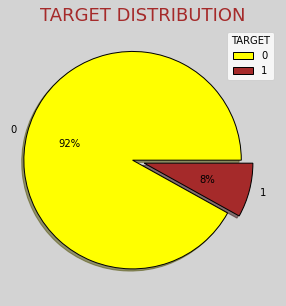

In [60]:
plt.figure(figsize=(5,5), facecolor='lightgrey')
plt.pie(application_data.TARGET.value_counts(), explode = (0.1,0.01), colors=('yellow', 'brown'), labels = ('0', '1'), 
        autopct='%1.0f%%', shadow = True, wedgeprops={"linewidth":1,"edgecolor":"k"})
plt.title('TARGET DISTRIBUTION', fontdict= {'fontsize': 18, 'fontweight' : 10, 'color' : 'Brown'})
plt.legend(title = 'TARGET')
plt.show()

**Inference:**  
1. We can see its a highly imbalanced dataset of ratio of 2:23
2. 8% of clients are those with payment difficulties and may have the chances of defaulting loan. And the rest                    92% are able to pay their loan on time

### Distribution of Contract types

In [61]:
application_data.NAME_CONTRACT_TYPE.value_counts(normalize = True)

Cash loans         0.904787
Revolving loans    0.095213
Name: NAME_CONTRACT_TYPE, dtype: float64

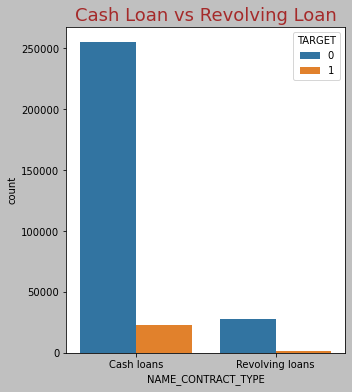

In [62]:
plt.figure(figsize=(5,6), facecolor = 'silver')
ax = sns.countplot(data = application_data, x = 'NAME_CONTRACT_TYPE', hue = 'TARGET')
plt.title('Cash Loan vs Revolving Loan', fontdict= {'fontsize': 18, 'fontweight' : 10, 'color' : 'Brown'})
plt.show()

**Inference:**  
  1. Number of the clients applied for cash loans (90%) is much higher than Revolving loans(10%)
  2. Client with cash loans have the higher chances of defaulting loan.

### Gender distribution

In [63]:
application_data.CODE_GENDER.value_counts(normalize = True)

F      0.658344
M      0.341643
XNA    0.000013
Name: CODE_GENDER, dtype: float64

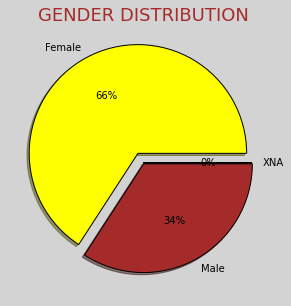

In [64]:
plt.figure(figsize=(5,5), facecolor='lightgrey')
plt.pie(application_data.CODE_GENDER.value_counts(), explode = (0.1,0.01, 0.0), colors=('yellow', 'brown'), labels = ('Female', 'Male', 'XNA'), 
        autopct='%1.0f%%', shadow = True, wedgeprops={"linewidth":1,"edgecolor":"k"})
plt.title('GENDER DISTRIBUTION', fontdict= {'fontsize': 18, 'fontweight' : 10, 'color' : 'Brown'})
plt.show()

In [65]:
application_data.CODE_GENDER.isnull().sum()

0

**Inference:**  
  1. Number of female clients is 64% and number of male clients is 34%
  2. Female clients tend to take more loans than male clients

### Contract type vs Gender

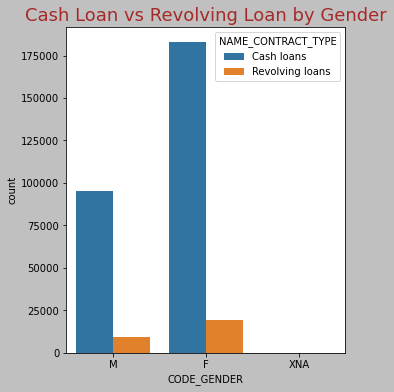

In [66]:
plt.figure(figsize=(5,6), facecolor = 'silver')
sns.countplot(data = application_data, x = 'CODE_GENDER', hue = 'NAME_CONTRACT_TYPE')
plt.title('Cash Loan vs Revolving Loan by Gender', fontdict= {'fontsize': 18, 'fontweight' : 10, 'color' : 'Brown'})
plt.show()

**Inference:**  Both gender prefer Cash loan over Revolving loan

### Distribution of Cars

In [67]:
application_data.FLAG_OWN_CAR.value_counts(normalize=True)

N    0.659892
Y    0.340108
Name: FLAG_OWN_CAR, dtype: float64

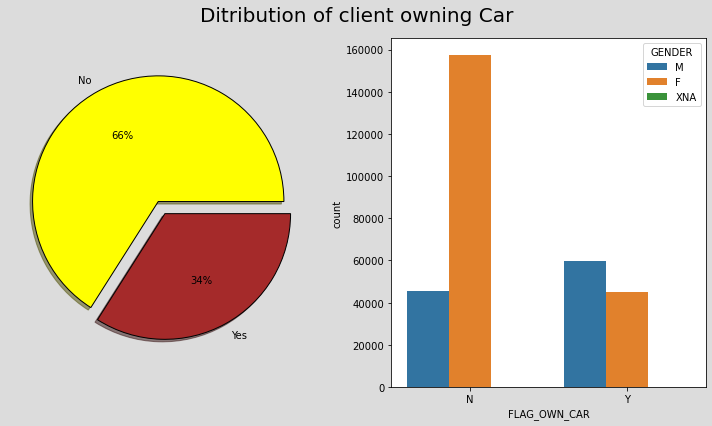

In [68]:
plt.figure(figsize=(10,6), facecolor='gainsboro')

plt.subplot(1,2,1)
plt.pie(x = application_data.FLAG_OWN_CAR.value_counts(),explode = (0.1,0.01), colors=('yellow', 'brown'), labels = ('No', 'Yes'), 
        autopct='%1.0f%%', shadow = True, wedgeprops={"linewidth":1,"edgecolor":"k"})
plt.subplot(1,2,2)
sns.countplot(data=application_data, x='FLAG_OWN_CAR', hue='CODE_GENDER')

plt.suptitle('Ditribution of client owning Car', fontsize = 20 )
plt.legend(title = 'GENDER')
plt.tight_layout()
plt.show()

**Inference:**   
   1. 66% percent of clients do not own car
   2. Male clients own more car than female clients

### Ditribution of Realty

In [69]:
application_data.FLAG_OWN_REALTY.value_counts(normalize=True)

Y    0.693673
N    0.306327
Name: FLAG_OWN_REALTY, dtype: float64

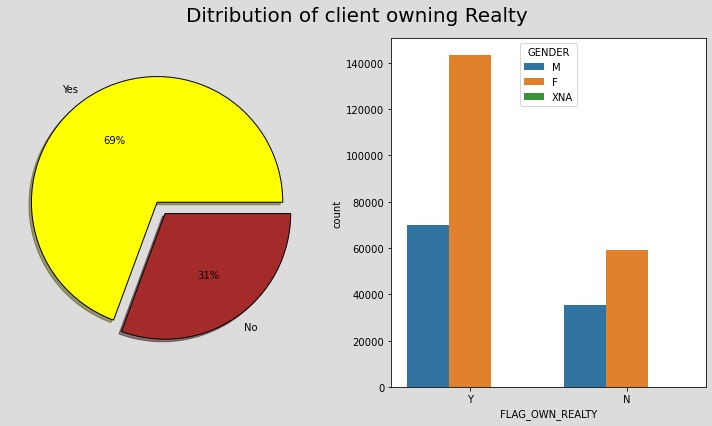

In [70]:
plt.figure(figsize=(10,6), facecolor='gainsboro')

plt.subplot(1,2,1)
plt.pie(x = application_data.FLAG_OWN_REALTY.value_counts(),explode = (0.1,0.01), colors=('yellow', 'brown'), labels = ('Yes', 'No'), 
        autopct='%1.0f%%', shadow = True, wedgeprops={"linewidth":1,"edgecolor":"k"})
plt.subplot(1,2,2)
sns.countplot(data=application_data, x='FLAG_OWN_REALTY', hue='CODE_GENDER')

plt.suptitle('Ditribution of client owning Realty', fontsize = 20 )
plt.legend(title = 'GENDER')
plt.tight_layout()
plt.show()

**Inference:**   
   1. 69% percent of clients own realty property
   2. Female clients own more realty than male clients

### Distribution of Types of house

In [71]:
application_data.NAME_HOUSING_TYPE.value_counts()

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

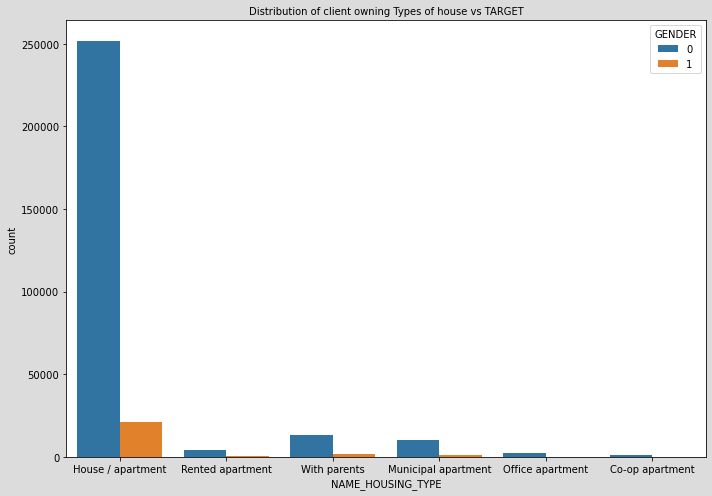

In [72]:
plt.figure(figsize=(10,7), facecolor='gainsboro')
sns.countplot(data=application_data, x='NAME_HOUSING_TYPE', hue='TARGET')

plt.title('Distribution of client owning Types of house vs TARGET', fontsize = 10)
plt.legend(title = 'GENDER')
plt.tight_layout()
plt.show()

**Inference:** Client owning House or apartment tends to make repayment on time

### Realty vs Target variables

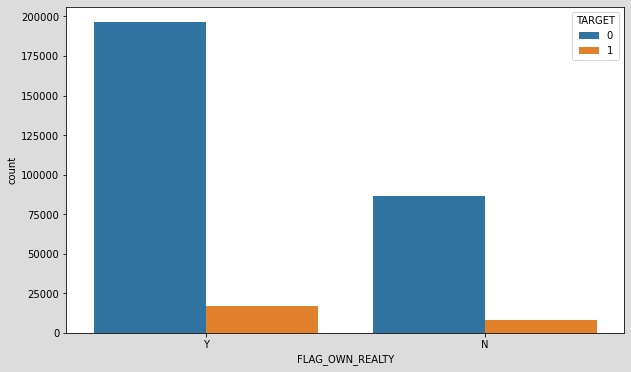

In [73]:
plt.figure(figsize=(10,6), facecolor='gainsboro')
sns.countplot(data=application_data, x='FLAG_OWN_REALTY', hue='TARGET')
plt.show()

**Inference:**   Clients owning realty properties tend to make their loan payments on time

### Distribution of Number of children client has  vs Target

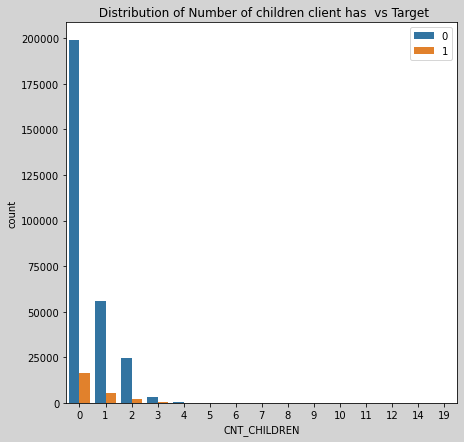

In [74]:
fig = plt.figure(figsize=(7,7), facecolor='lightgrey')
sns.countplot(data = application_data, x = 'CNT_CHILDREN', hue=application_data["TARGET"])
plt.title(" Distribution of Number of children client has  vs Target")
plt.legend(loc = 'upper right')
plt.show()

**Inference:**   Clients with no children tend to repay their installments on time.

### Distribution of type of people accompanying client

In [75]:
application_data.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Missing              1292
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

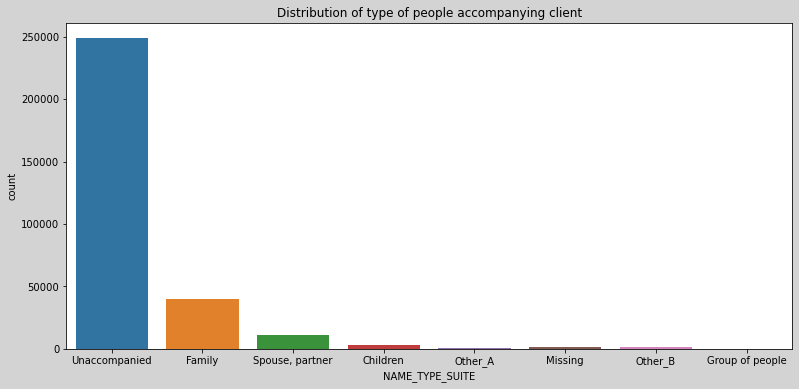

In [76]:
plt.figure(figsize = (13,6),facecolor='lightgrey')
sns.countplot(data = application_data, x = application_data.NAME_TYPE_SUITE)
plt.title('Distribution of type of people accompanying client')
plt.show()

**Inference:**   Most of the client were unaccompanied by anyone while applying for the loan.

### Distribution of Income types of client

In [77]:
application_data.NAME_INCOME_TYPE.value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

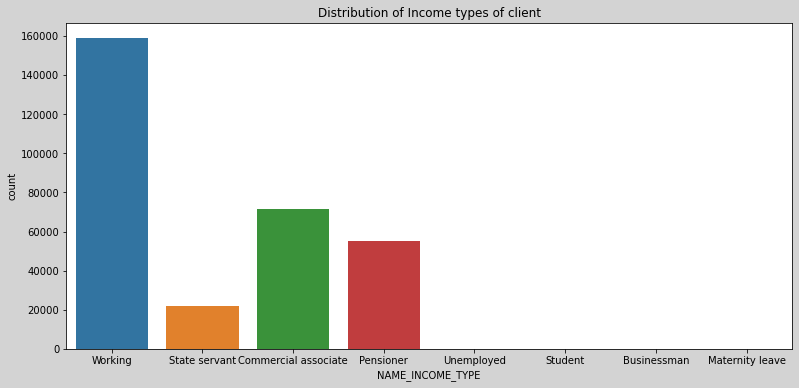

In [78]:
plt.figure(figsize = (13,6),facecolor='lightgrey')
sns.countplot(data = application_data, x = application_data.NAME_INCOME_TYPE)
plt.title('Distribution of Income types of client')
plt.show()

**Inference:**    
    1. Working people are among the highest who are applying for loan.  
    2. Businessmen, Unemployed people, students, and ones with maternity leave are those whose numbers are very low.  

### Education types vs Target

In [79]:
application_data.NAME_EDUCATION_TYPE.value_counts(normalize=True)

Secondary / secondary special    0.710189
Higher education                 0.243448
Incomplete higher                0.033420
Lower secondary                  0.012409
Academic degree                  0.000533
Name: NAME_EDUCATION_TYPE, dtype: float64

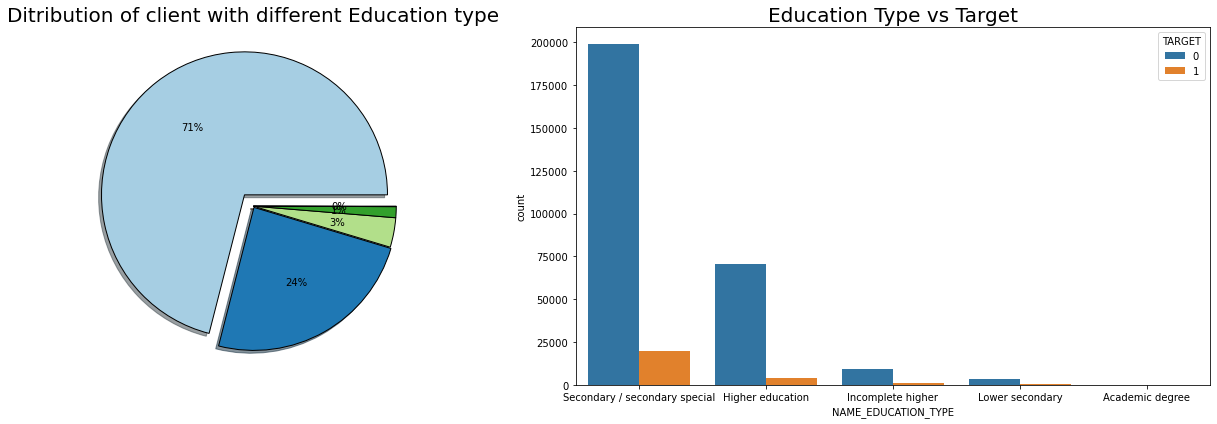

In [80]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
plt.pie(x = application_data.NAME_EDUCATION_TYPE.value_counts(),explode = (0.1,0.01,0,0,0), colors=sns.color_palette("Paired",5), 
        autopct='%1.0f%%', shadow = True, wedgeprops={"linewidth":1,"edgecolor":"k"})
plt.title('Ditribution of client with different Education type',fontsize = 20)

plt.subplot(1,2,2)
sns.countplot(data=application_data, x='NAME_EDUCATION_TYPE', hue='TARGET',)
plt.title('Education Type vs Target', fontsize = 20 )
plt.legend(title = 'TARGET')

plt.tight_layout()
plt.show()

**Inference:** 
1. 71% of clients with secondary education are applying for loan and they are also those with higher chances of                   defaulting.
2. 24% of clients are those higher education

### Distribution of Family status vs Target variable

In [81]:
application_data.NAME_FAMILY_STATUS.value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

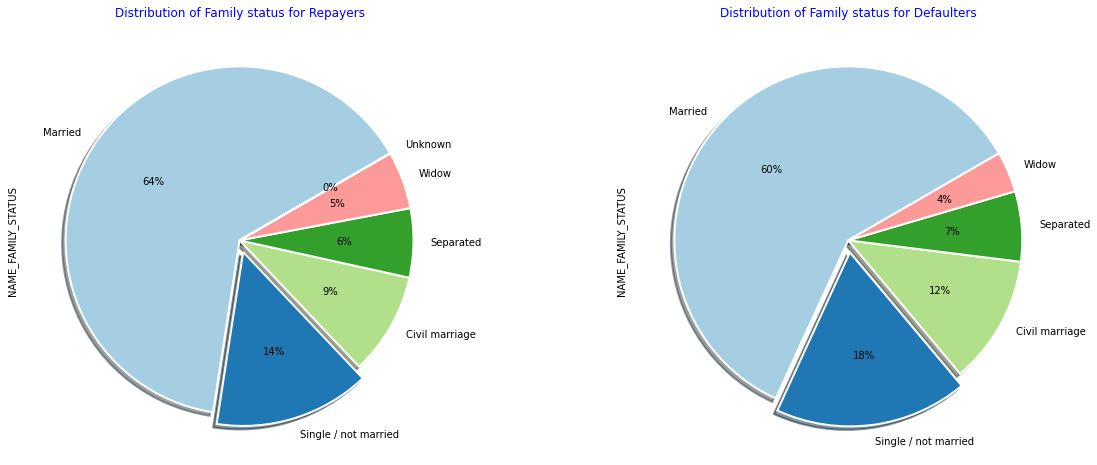

In [82]:
plt.figure(figsize=(20,8))
plt.subplot(121)
application_data_0.NAME_FAMILY_STATUS.value_counts().plot.pie(autopct = "%1.0f%%",startangle=30,
                                    colors = sns.color_palette("Paired",5), wedgeprops={"linewidth":2,"edgecolor":"white"},
                                    shadow =True,explode=[0,.07,0,0,0,0])
plt.title("Distribution of Family status for Repayers",color="b")

plt.subplot(122)
application_data_1.NAME_FAMILY_STATUS.value_counts().plot.pie(autopct = "%1.0f%%", startangle=30,
                                       colors = sns.color_palette("Paired",5),wedgeprops={"linewidth":2,"edgecolor":"white"},
                                       shadow =True,explode=[0,.07,0,0,0])

plt.title("Distribution of Family status for Defaulters",color="b")
plt.show()

**Inference:**   
    1. In both cases number of married clients are highest who are repayers as well as defaulters.  
    2. Defaulters percentage is more in case of single, civil marriage and separated cases

### FLAG_MOBIL, FLAG_CONT_MOBIL, FLAG_EMAIL vs Target variable

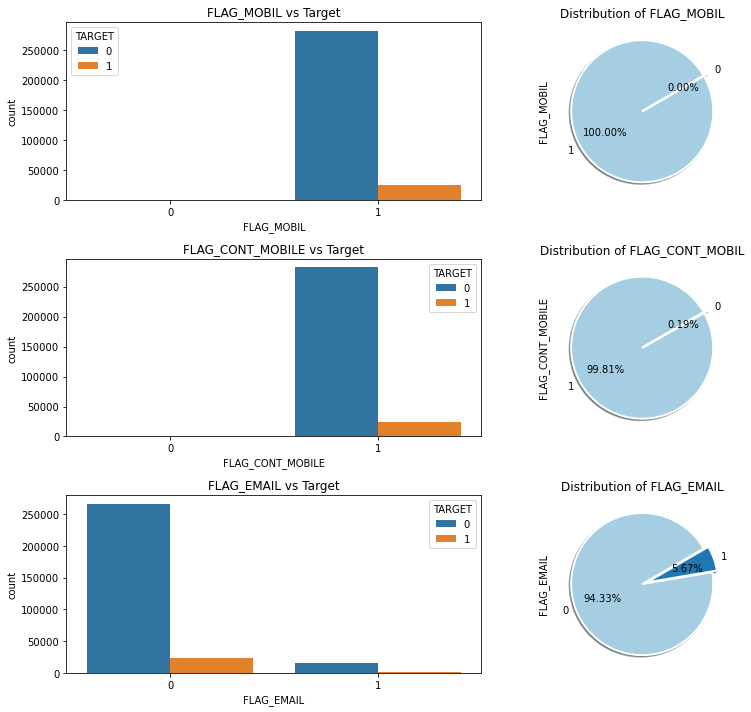

In [83]:
plt.figure(figsize = (12,10))
plt.subplot(3,2,1)
sns.countplot(data=application_data, x='FLAG_MOBIL', hue='TARGET')
plt.title('FLAG_MOBIL vs Target')
plt.legend(title = 'TARGET', loc = 'upper left')

plt.subplot(3,2,2)
application_data.FLAG_MOBIL.value_counts().plot.pie(autopct = "%0.2f%%",startangle=30,
                                    colors = sns.color_palette("Paired",5), wedgeprops={"linewidth":2,"edgecolor":"white"},
                                    shadow =True,explode=[0,.07])
plt.title("Distribution of FLAG_MOBIL")


plt.subplot(3,2,3)
sns.countplot(data=application_data, x='FLAG_CONT_MOBILE', hue='TARGET')
plt.title('FLAG_CONT_MOBILE vs Target')
plt.legend(title = 'TARGET')

plt.subplot(3,2,4)
application_data.FLAG_CONT_MOBILE.value_counts().plot.pie(autopct = "%0.2f%%",startangle=30,
                                    colors = sns.color_palette("Paired",5), wedgeprops={"linewidth":2,"edgecolor":"white"},
                                    shadow =True,explode=[0,.07])
plt.title("Distribution of FLAG_CONT_MOBIL")


plt.subplot(3,2,5)
sns.countplot(data=application_data, x='FLAG_EMAIL', hue='TARGET')
plt.title('FLAG_EMAIL vs Target')
plt.legend(title = 'TARGET')

plt.subplot(3,2,6)
application_data.FLAG_EMAIL.value_counts().plot.pie(autopct = "%0.2f%%",startangle=30,
                                    colors = sns.color_palette("Paired",5), wedgeprops={"linewidth":2,"edgecolor":"white"},
                                    shadow =True,explode=[0,.07])
plt.title("Distribution of FLAG_EMAIL")

plt.tight_layout()
plt.show()

**Inference:**  
     1. All of the clients have given their mobile number.  
     2. Almost all of the clients mobile number is reachable.  
     3. Only 6% of the clients have given thier email ids
 

### Distribution of Occupation Types

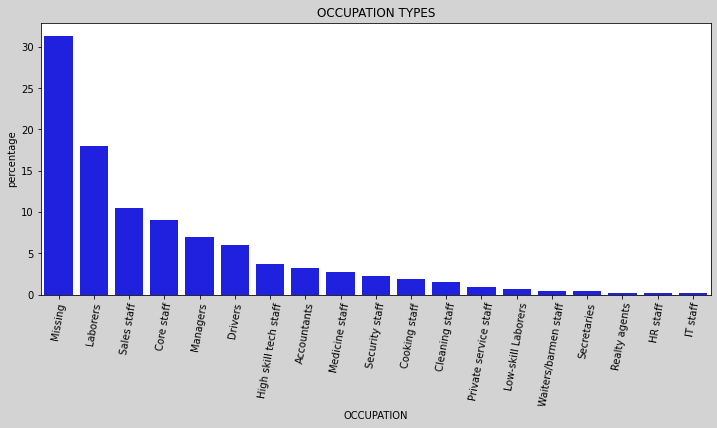

In [84]:
occupation = application_data["OCCUPATION_TYPE"].value_counts().reset_index()
occupation["percentage"] = round(occupation["OCCUPATION_TYPE"]*100/occupation["OCCUPATION_TYPE"].sum(),2)
fig = plt.figure(figsize=(12,5))
ax = sns.barplot(x ="index",y = "percentage",data=occupation,color="blue")
plt.xticks(rotation = 80)
plt.xlabel("OCCUPATION")
plt.ylabel("percentage")
plt.title("OCCUPATION TYPES")
fig.set_facecolor('lightgrey')

**Inference:**  
       1. Most of the applicant's occupation is missing.  
       2. Top applicants are Laborers, Sales Staff, Core staff

### Region Rating vs Target variable

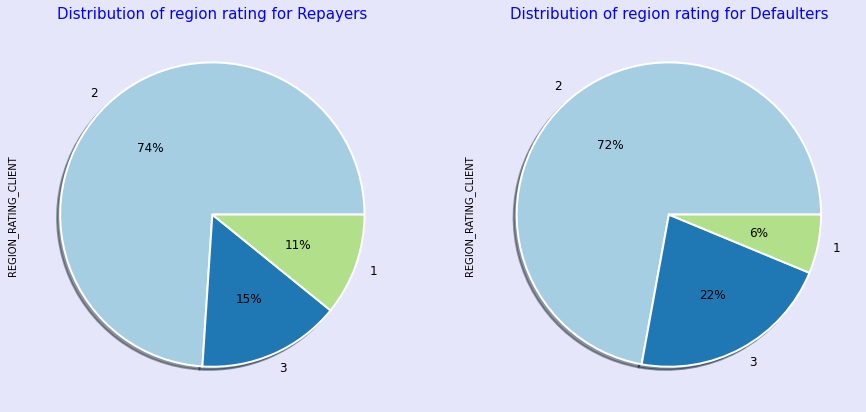

In [85]:
fig = plt.figure(figsize=(15,15),facecolor= "lavender")
plt.subplot(121)
application_data_0.REGION_RATING_CLIENT.value_counts().plot.pie(autopct = "%1.0f%%",fontsize=12,
                                                             colors = sns.color_palette("Paired"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)

plt.title("Distribution of region rating for Repayers",color="b", fontsize = 15)

plt.subplot(122)
application_data_1.REGION_RATING_CLIENT.value_counts().plot.pie(autopct = "%1.0f%%",fontsize=12,
                                                    colors = sns.color_palette("Paired"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)


plt.title("Distribution of region rating for Defaulters",color="b",fontsize = 15)
plt.show()

**Inference:**  
        1. Most of the city region of repayers and defaulters have been rated 2 out of 3.  
        2. Percentage of defaulters are less in 1 rated region compared to repayers.  
        3. Percentage of defaulters are higher in 3 rated region compared to repayers.

### Region Rating by city vs Target variable

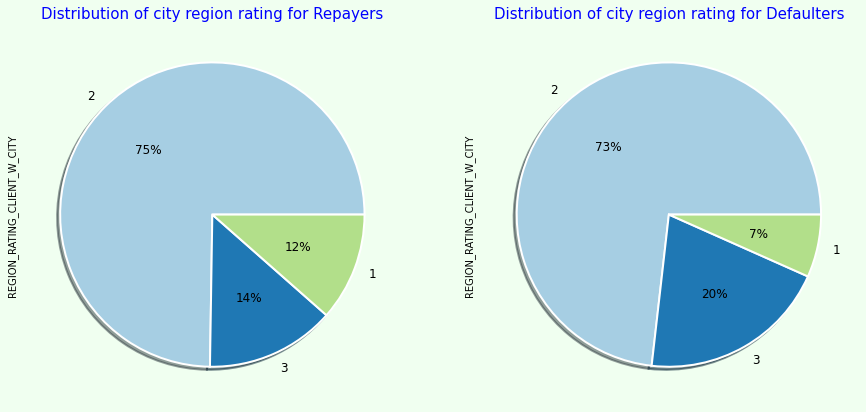

In [86]:
fig = plt.figure(figsize=(15,15),facecolor= "honeydew")
plt.subplot(121)
application_data_0.REGION_RATING_CLIENT_W_CITY.value_counts().plot.pie(autopct = "%1.0f%%",fontsize=12,
                                                             colors = sns.color_palette("Paired"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)

plt.title("Distribution of city region rating for Repayers",color="b",fontsize = 15)

plt.subplot(122)
application_data_1.REGION_RATING_CLIENT_W_CITY.value_counts().plot.pie(autopct = "%1.0f%%",fontsize=12,
                                                    colors = sns.color_palette("Paired"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)


plt.title("Distribution of city region rating for Defaulters",color="b", fontsize = 15)
plt.show()

**Inference:**  
        1. Most of the city region of repayers and defaulters have been rated 2 out of 3.  
        2. Percentage of defaulters are less in 1 rated city region compared to repayers.  
        3. Percentage of defaulters are higher in 3 rated city region compared to repayers.

### WEEKDAY_APPR_PROCESS_START
On which day of the week did the client apply for the loan

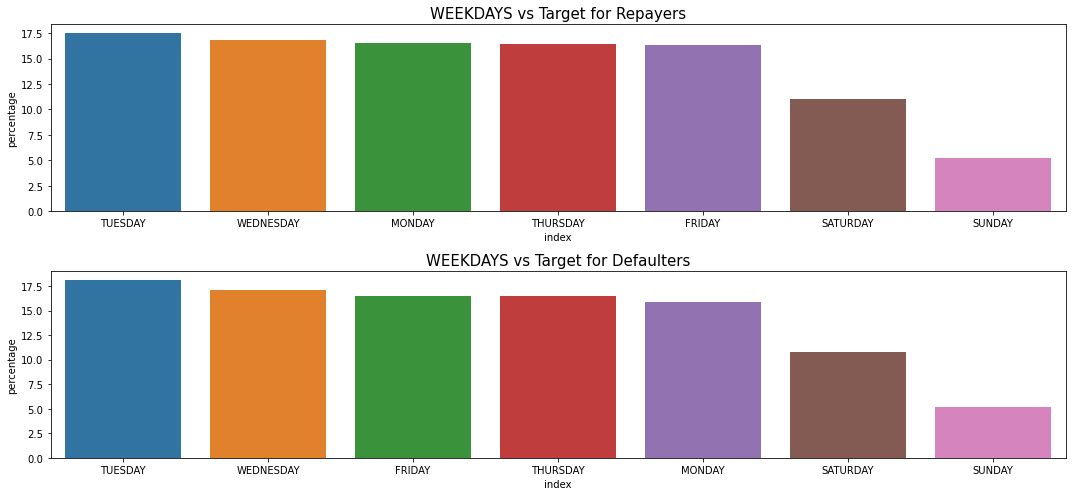

In [87]:
plt.figure(figsize = (15,7))
plt.subplot(2,1,1)
week = application_data_0["WEEKDAY_APPR_PROCESS_START"].value_counts().reset_index()
week["percentage"] = round(week["WEEKDAY_APPR_PROCESS_START"]*100/week["WEEKDAY_APPR_PROCESS_START"].sum(),2)
sns.barplot(data=week, x= 'index', y = 'percentage')
plt.title('WEEKDAYS vs Target for Repayers', fontsize = 15)

plt.subplot(2,1,2)
week = application_data_1["WEEKDAY_APPR_PROCESS_START"].value_counts().reset_index()
week["percentage"] = round(week["WEEKDAY_APPR_PROCESS_START"]*100/week["WEEKDAY_APPR_PROCESS_START"].sum(),2)
sns.barplot(data=week, x= 'index', y = 'percentage')
plt.title('WEEKDAYS vs Target for Defaulters', fontsize = 15)
plt.tight_layout()
plt.show()

**Inference:** Loan application processes are highest on Tuesday

### HOUR_APPR_PROCESS_START
Approximately at what hour did the client apply for the loan

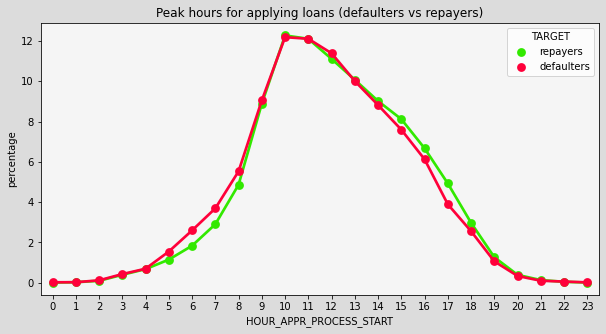

In [88]:
plt.figure(figsize = (10,5), facecolor='gainsboro')

hr = application_data.groupby("TARGET").agg({"HOUR_APPR_PROCESS_START":"value_counts"})
hr = hr.rename(columns={"HOUR_APPR_PROCESS_START":"value_counts"}).reset_index()
hr_0 = hr[hr["TARGET"]==0]
hr_1 = hr[hr["TARGET"]==1]
hr_0["percentage"] = hr_0["value_counts"]*100/hr_0["value_counts"].sum()
hr_1["percentage"] = hr_1["value_counts"]*100/hr_1["value_counts"].sum()
hrs = pd.concat([hr_0,hr_1],axis=0)
hrs["TARGET"] = hrs["TARGET"].replace({1:"defaulters",0:"repayers"})
hrs = hrs.sort_values(by="HOUR_APPR_PROCESS_START",ascending=True)

ax = sns.pointplot("HOUR_APPR_PROCESS_START","percentage",
                    data=hrs,hue="TARGET",palette="prism")
ax.set_facecolor('whitesmoke')
ax.set_title("Peak hours for applying loans (defaulters vs repayers)")
fig.set_facecolor("snow")

**Inference:**  Around 10:00 AM to 12:00 PM, loan application processes are highest

### Living region vs Target variable

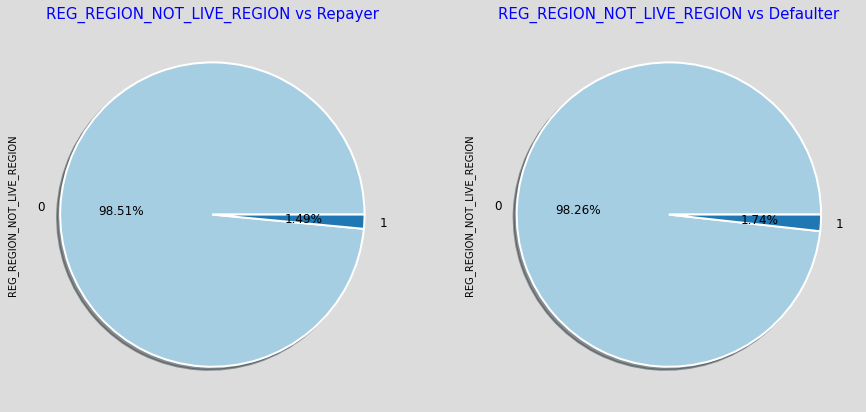

In [89]:
fig = plt.figure(figsize=(15,15),facecolor= "gainsboro")
plt.subplot(121)
application_data_0.REG_REGION_NOT_LIVE_REGION.value_counts().plot.pie(autopct = "%0.2f%%",fontsize=12,
                                                             colors = sns.color_palette("Paired"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)

plt.title("REG_REGION_NOT_LIVE_REGION vs Repayer",color="b",fontsize = 15)

plt.subplot(122)
application_data_1.REG_REGION_NOT_LIVE_REGION.value_counts().plot.pie(autopct = "%0.2f%%",fontsize=12,
                                                    colors = sns.color_palette("Paired"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)


plt.title("REG_REGION_NOT_LIVE_REGION vs Defaulter",color="b", fontsize = 15)
plt.show()

**Inference:**  98% of client's permanent address matches with the contact address

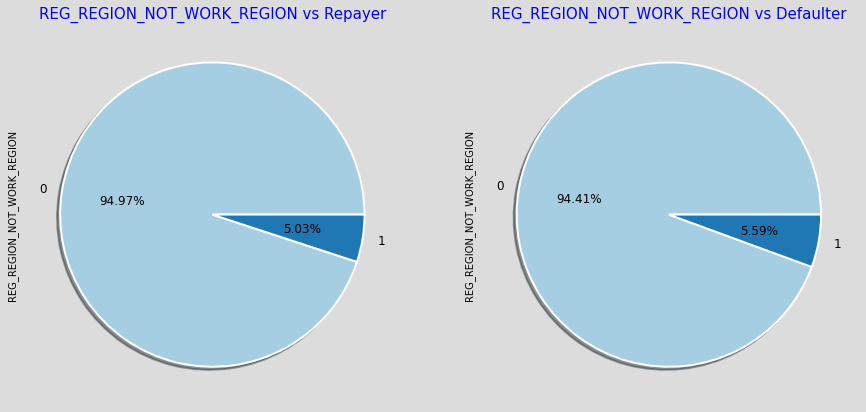

In [90]:
fig = plt.figure(figsize=(15,15),facecolor= "gainsboro")
plt.subplot(121)
application_data_0.REG_REGION_NOT_WORK_REGION.value_counts().plot.pie(autopct = "%0.2f%%",fontsize=12,
                                                             colors = sns.color_palette("Paired"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)

plt.title("REG_REGION_NOT_WORK_REGION vs Repayer",color="b",fontsize = 15)

plt.subplot(122)
application_data_1.REG_REGION_NOT_WORK_REGION.value_counts().plot.pie(autopct = "%0.2f%%",fontsize=12,
                                                    colors = sns.color_palette("Paired"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)


plt.title("REG_REGION_NOT_WORK_REGION vs Defaulter",color="b", fontsize = 15)
plt.show()

**Inference:**  94% of client's permanent address matches with the work address

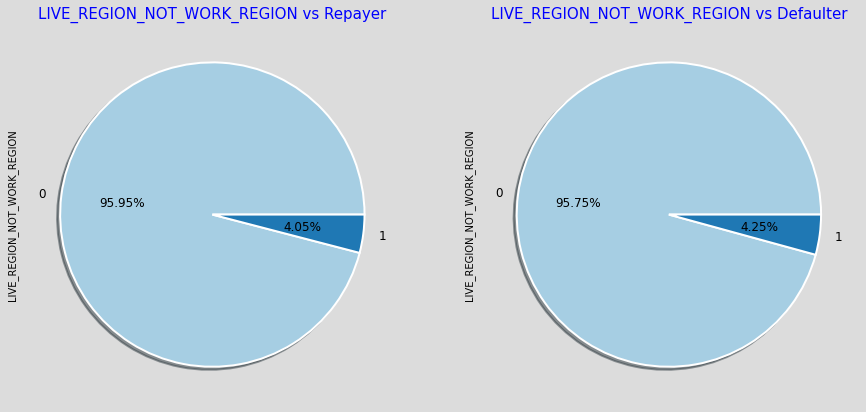

In [91]:
fig = plt.figure(figsize=(15,15),facecolor= "gainsboro")
plt.subplot(121)
application_data_0.LIVE_REGION_NOT_WORK_REGION.value_counts().plot.pie(autopct = "%0.2f%%",fontsize=12,
                                                             colors = sns.color_palette("Paired"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)

plt.title("LIVE_REGION_NOT_WORK_REGION vs Repayer",color="b",fontsize = 15)

plt.subplot(122)
application_data_1.LIVE_REGION_NOT_WORK_REGION.value_counts().plot.pie(autopct = "%0.2f%%",fontsize=12,
                                                    colors = sns.color_palette("Paired"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)


plt.title("LIVE_REGION_NOT_WORK_REGION vs Defaulter",color="b", fontsize = 15)
plt.show()

**Inference:**  95% of client's contact address matches with the work address

### Living region by city vs Target variable

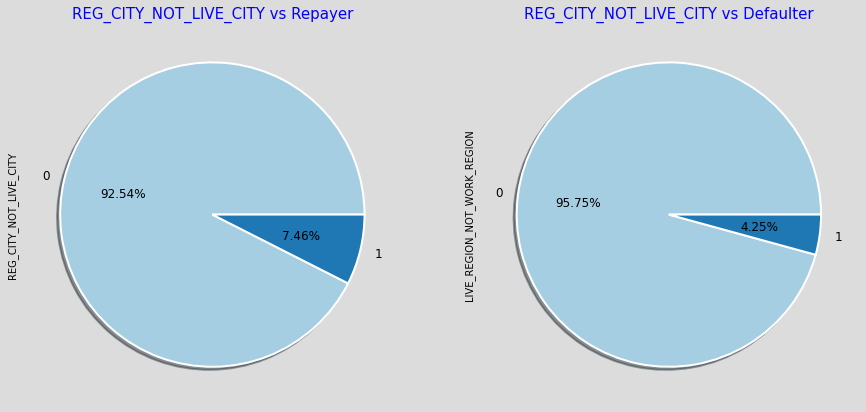

In [92]:
fig = plt.figure(figsize=(15,15),facecolor= "gainsboro")
plt.subplot(121)
application_data_0.REG_CITY_NOT_LIVE_CITY.value_counts().plot.pie(autopct = "%0.2f%%",fontsize=12,
                                                             colors = sns.color_palette("Paired"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)

plt.title("REG_CITY_NOT_LIVE_CITY vs Repayer",color="b",fontsize = 15)

plt.subplot(122)
application_data_1.LIVE_REGION_NOT_WORK_REGION.value_counts().plot.pie(autopct = "%0.2f%%",fontsize=12,
                                                    colors = sns.color_palette("Paired"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)


plt.title("REG_CITY_NOT_LIVE_CITY vs Defaulter",color="b", fontsize = 15)
plt.show()

**Inference:**  
        1. 92% of Repayer client's permanent address  matches with the contact address.  
        2. 95% of Defaulter client's permanent address matches with the contact address.

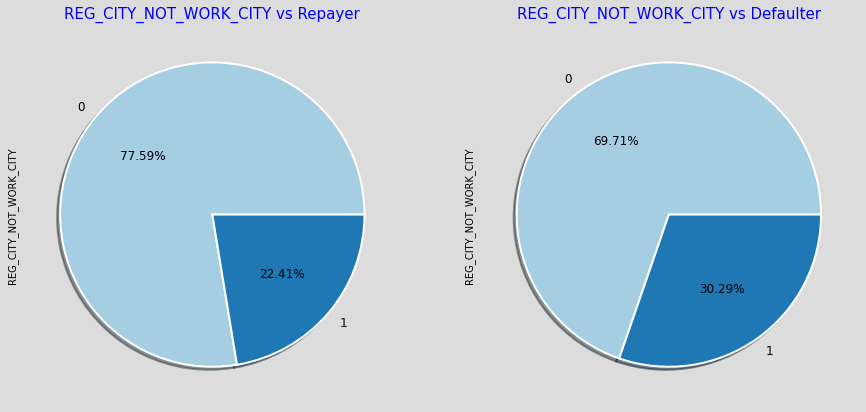

In [93]:
fig = plt.figure(figsize=(15,15),facecolor= "gainsboro")
plt.subplot(121)
application_data_0.REG_CITY_NOT_WORK_CITY.value_counts().plot.pie(autopct = "%0.2f%%",fontsize=12,
                                                             colors = sns.color_palette("Paired"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)

plt.title("REG_CITY_NOT_WORK_CITY vs Repayer",color="b",fontsize = 15)

plt.subplot(122)
application_data_1.REG_CITY_NOT_WORK_CITY.value_counts().plot.pie(autopct = "%0.2f%%",fontsize=12,
                                                    colors = sns.color_palette("Paired"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)


plt.title("REG_CITY_NOT_WORK_CITY vs Defaulter",color="b", fontsize = 15)
plt.show()

**Inference:**  
        1. 77% of Repayer client's permanent address  matches with the work address.  
        2. 69% of Defaulter client's permanent address matches with the work address.

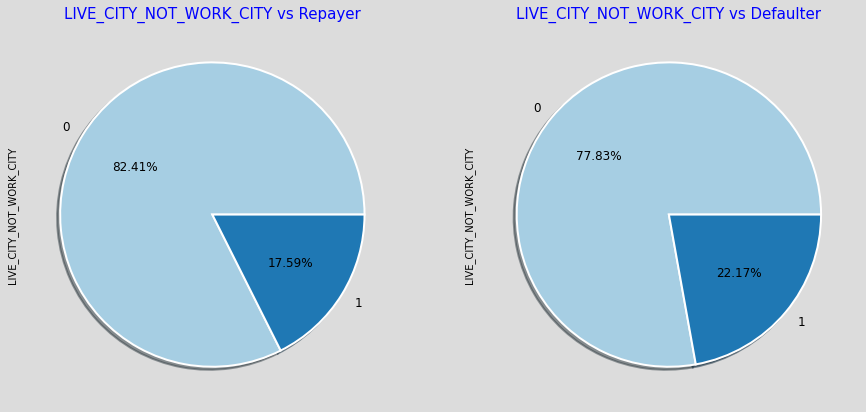

In [94]:
fig = plt.figure(figsize=(15,15),facecolor= "gainsboro")
plt.subplot(121)
application_data_0.LIVE_CITY_NOT_WORK_CITY.value_counts().plot.pie(autopct = "%0.2f%%",fontsize=12,
                                                             colors = sns.color_palette("Paired"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)

plt.title("LIVE_CITY_NOT_WORK_CITY vs Repayer",color="b",fontsize = 15)

plt.subplot(122)
application_data_1.LIVE_CITY_NOT_WORK_CITY.value_counts().plot.pie(autopct = "%0.2f%%",fontsize=12,
                                                    colors = sns.color_palette("Paired"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)


plt.title("LIVE_CITY_NOT_WORK_CITY vs Defaulter",color="b", fontsize = 15)
plt.show()

**Inference:**  
        1. 82% of Repayer client's contact address  matches with the work address.  
        2. 77% of Defaulter client's contact address matches with the work address.

### Organization Types vs Target variable

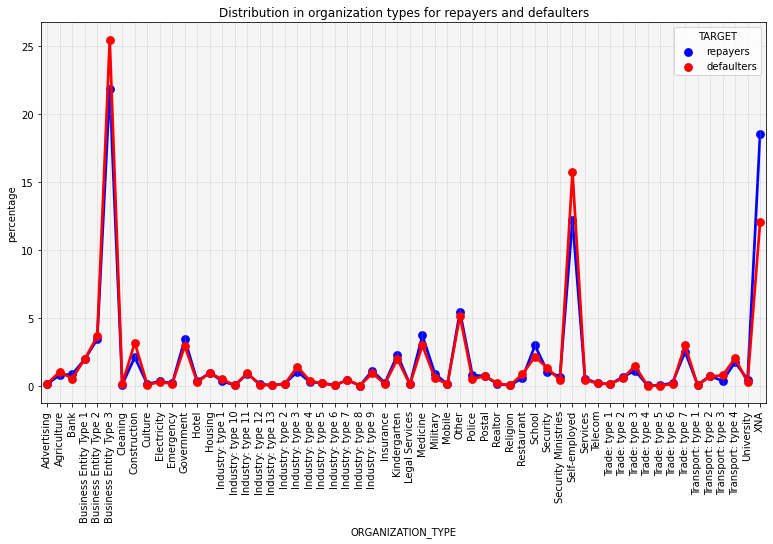

In [95]:
org = application_data.groupby("TARGET").agg({"ORGANIZATION_TYPE":"value_counts"})
org = org.rename(columns = {"ORGANIZATION_TYPE":"value_counts"}).reset_index()
org_0 = org[org["TARGET"] == 0]
org_1 = org[org["TARGET"] == 1]
org_0["percentage"] = org_0["value_counts"]*100/org_0["value_counts"].sum()
org_1["percentage"] = org_1["value_counts"]*100/org_1["value_counts"].sum()

organization = pd.concat([org_0,org_1],axis=0)
organization = organization.sort_values(by="ORGANIZATION_TYPE",ascending=True)

organization["TARGET"] = organization["TARGET"].replace({0:"repayers",1:"defaulters"})

organization
plt.figure(figsize=(13,7))
ax = sns.pointplot(x = "ORGANIZATION_TYPE",y = "percentage",
                   data=organization,hue="TARGET",palette=["b","r"])
plt.xticks(rotation=90)
plt.grid(True,alpha=.3)
ax.set_facecolor("whitesmoke")
ax.set_title("Distribution in organization types for repayers and defaulters")
plt.show()

**Inference:**  Organizations like Business Entity Type 3, Construction, Industry-type 3, Self-employed have percentage of defaulters higher than repayers.

### Documents provided by client

In [96]:
cols = ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 
        'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 
        'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 
        'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

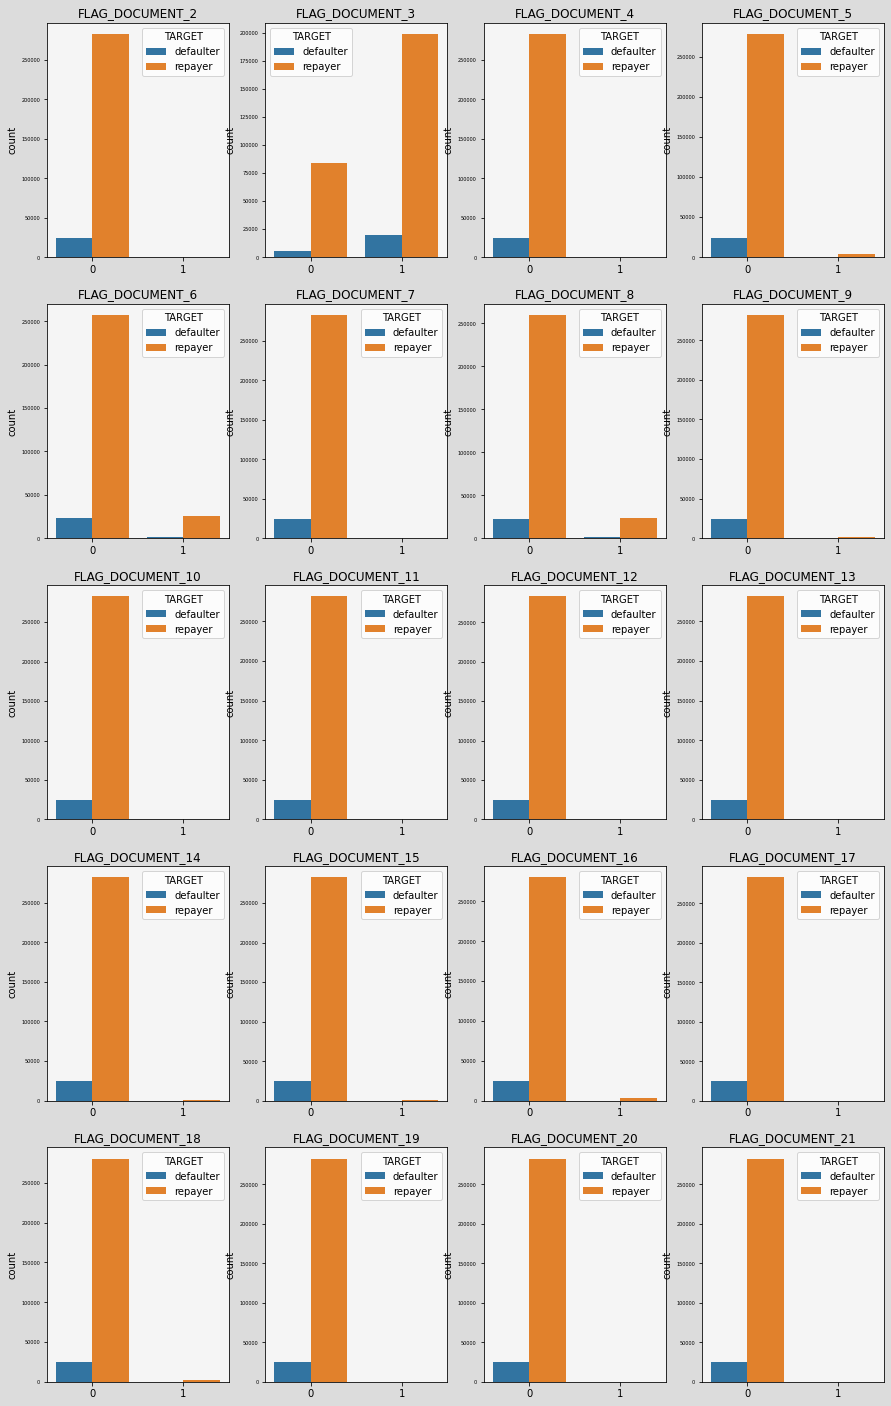

In [97]:
flag = application_data[cols+["TARGET"]]

length = len(cols)

flag["TARGET"] = flag["TARGET"].replace({1:"defaulter",0:"repayer"})

fig = plt.figure(figsize=(15,25))
fig.set_facecolor("gainsboro")
for i,j in itertools.zip_longest(cols,range(length)):
    plt.subplot(5,4,j+1)
    ax = sns.countplot(flag[i],hue=flag["TARGET"])
    plt.yticks(fontsize=5)
    plt.xlabel("")
    plt.title(i)
    ax.set_facecolor("whitesmoke")

**Inference:**  Most of the clients have not given different documents, except Document 3.

# Data Analysis of Numerical Variables

### Income of the Client
AMT_INCOME_TOTAL

In [98]:
application_data.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

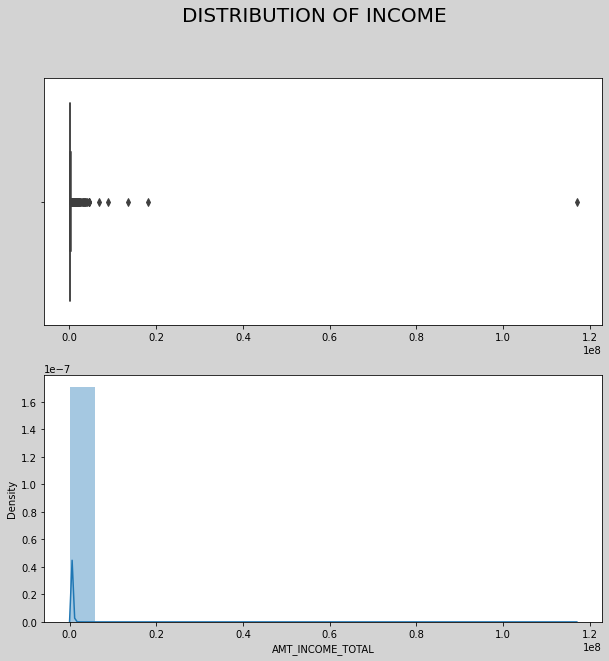

In [99]:
plt.figure(figsize = (10,10), facecolor='lightgrey')
plt.subplot(2,1,1)
sns.boxplot(data = application_data, x = 'AMT_INCOME_TOTAL')
plt.xlabel('')

plt.subplot(2,1,2)
sns.distplot(application_data.AMT_INCOME_TOTAL, bins=20)
plt.suptitle('DISTRIBUTION OF INCOME', fontsize = 20)
plt.show()

In [100]:
#function to detect outlier
def detect_outlier(data):
    # find q1 and q3 values
    q1, q3 = np.percentile(sorted(data), [25, 75])
 
    # compute IRQ
    iqr = q3 - q1
 
    # find lower and upper bounds
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
 
    outliers = [x for x in data if x <= lower_bound or x >= upper_bound]
 
    return outliers

In [101]:
#length of the outliers
len(detect_outlier(application_data['AMT_INCOME_TOTAL']))

15825

**Inference:**  As there are so many points outside the lowerbound and upperbound, we can infer that income column has lots of outliers

### Credit amount of loan of the Client
AMT_CREDIT

In [102]:
application_data.AMT_CREDIT.describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

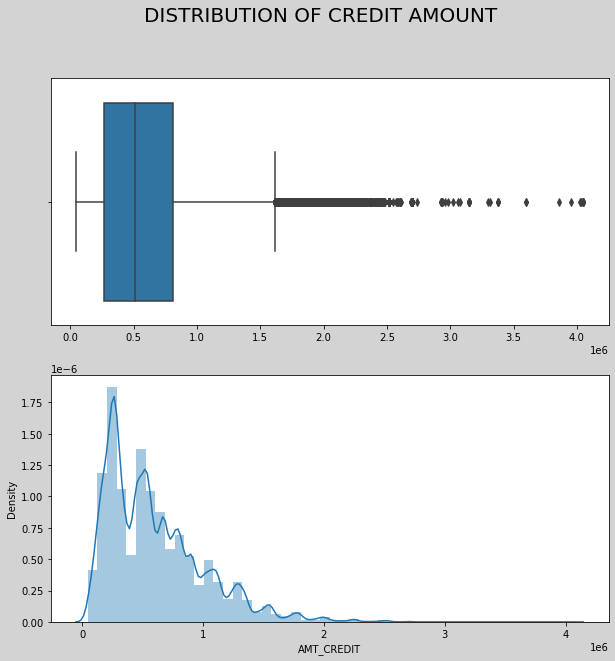

In [103]:
plt.figure(figsize = (10,10), facecolor='lightgrey')
plt.subplot(2,1,1)
sns.boxplot(data = application_data, x = 'AMT_CREDIT')
plt.xlabel('')

plt.subplot(2,1,2)
sns.distplot(application_data.AMT_CREDIT)
plt.suptitle('DISTRIBUTION OF CREDIT AMOUNT', fontsize = 20)
plt.show()

In [104]:
#length of the outliers
len(detect_outlier(application_data['AMT_CREDIT']))

6562

**Inference:**  
1. As there are so many points outside the upperbound, we can infer that loan credit column has lots of outliers
2. The distribution is right skewed, which means mean is greater than median
3. Most of the credit amount lies below 1 miilion.

### Loan Annuity
AMT_ANNUITY

In [105]:
application_data.AMT_ANNUITY.describe()

count    307511.000000
mean      27108.487841
std       14493.461065
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

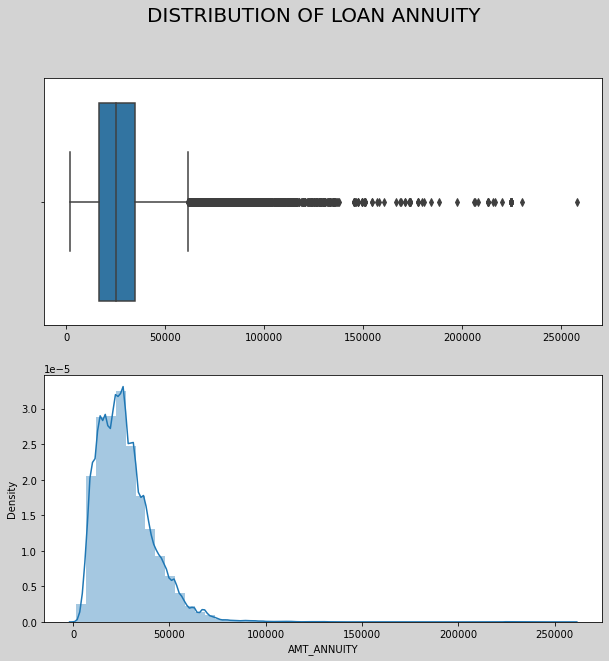

In [106]:
plt.figure(figsize = (10,10), facecolor='lightgrey')
plt.subplot(2,1,1)
sns.boxplot(data = application_data, x = 'AMT_ANNUITY')
plt.xlabel('')

plt.subplot(2,1,2)
sns.distplot(application_data.AMT_ANNUITY)
plt.suptitle('DISTRIBUTION OF LOAN ANNUITY', fontsize = 20)
plt.show()

In [107]:
#length of the outliers
len(detect_outlier(application_data['AMT_ANNUITY']))

7504

**Inference:**  
1. As there are so many points outside the upperbound, we can infer that loan credit column has lots of outliers
2. The distribution is right skewed, which means mean is greater than median
3. Most of the annuity amount lies below 50000.

### Goods Price
AMT_GOODS_PRICE
For consumer loans it is the price of the goods for which the loan is given

In [108]:
application_data.AMT_GOODS_PRICE.describe()

count    3.075110e+05
mean     5.383163e+05
std      3.692890e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

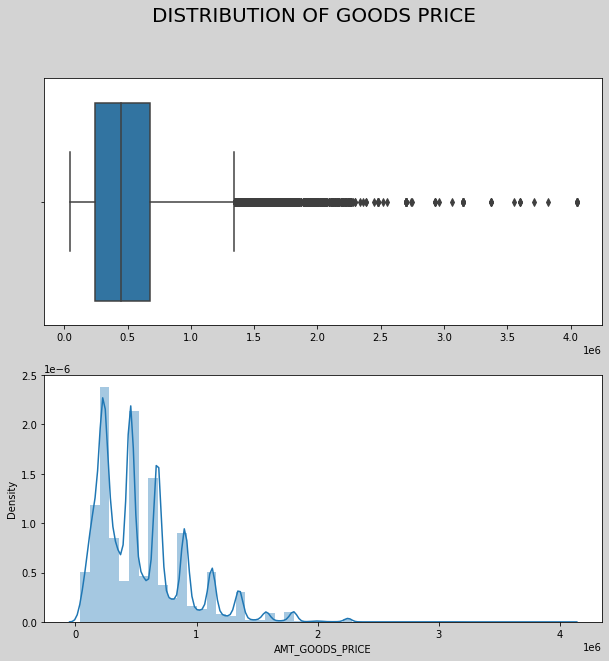

In [109]:
plt.figure(figsize = (10,10), facecolor='lightgrey')
plt.subplot(2,1,1)
sns.boxplot(data = application_data, x = 'AMT_GOODS_PRICE')
plt.xlabel('')

plt.subplot(2,1,2)
sns.distplot(application_data.AMT_GOODS_PRICE)
plt.suptitle('DISTRIBUTION OF GOODS PRICE', fontsize = 20)
plt.show()

In [110]:
#length of the outliers
len(detect_outlier(application_data['AMT_GOODS_PRICE']))

14765

**Inference:**  
1. As there are so many points outside the upperbound in boxplot, we can infer that loan credit column has lots of outliers
2. The distribution is right skewed, which means mean is greater than median
3. Most of the goods price lies below 1 million.

In [111]:
application_data[num_col].head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,202500.0,406597.5,24700.5,351000.0,0.018801,9461,637,3648.0,2120,1.0,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,1188,1186.0,291,2.0,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,67500.0,135000.0,6750.0,135000.0,0.010032,19046,225,4260.0,2531,1.0,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,135000.0,312682.5,29686.5,297000.0,0.008019,19005,3039,9833.0,2437,2.0,2.0,0.0,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,121500.0,513000.0,21865.5,513000.0,0.028663,19932,3038,4311.0,3458,1.0,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0


### Amount columns vs Target variable

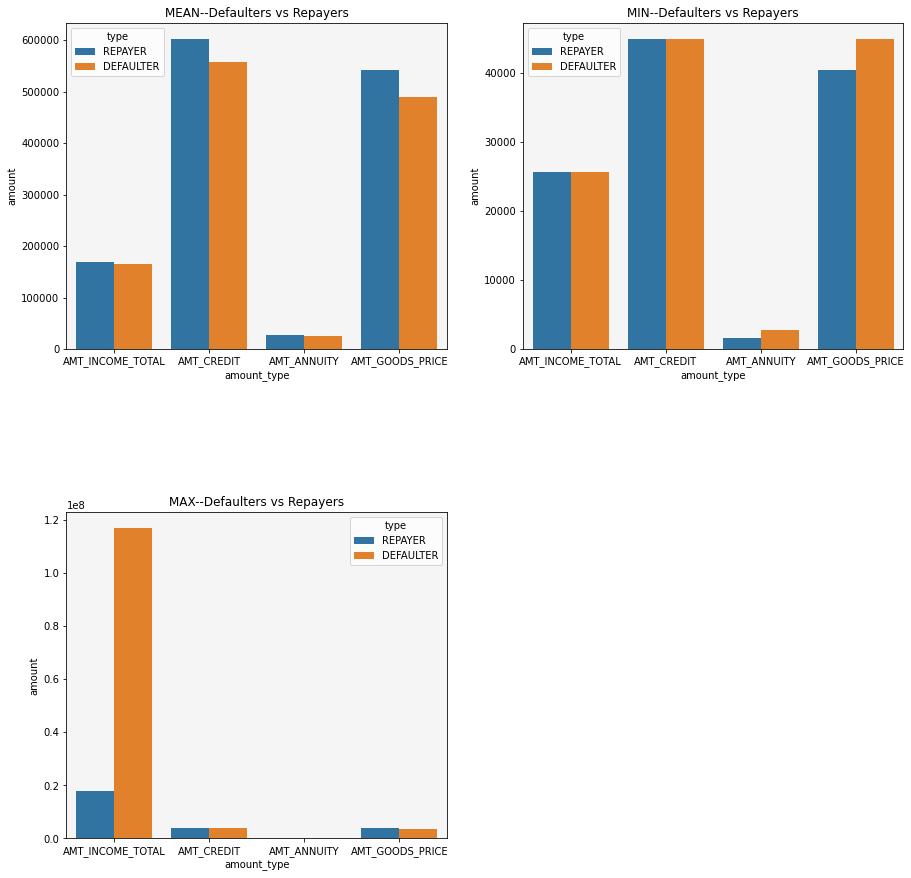

In [112]:
amt = [ 'AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']

df = application_data.groupby("TARGET")[amt].describe().transpose().reset_index()
df = df[df["level_1"].isin([ 'mean', 'min', 'max'])] 
df_x = df[["level_0","level_1",0]]
df_y = df[["level_0","level_1",1]]
df_x = df_x.rename(columns={'level_0':"amount_type", 'level_1':"statistic", 0:"amount"})
df_x["type"] = "REPAYER"
df_y = df_y.rename(columns={'level_0':"amount_type", 'level_1':"statistic", 1:"amount"})
df_y["type"] = "DEFAULTER"
df_new = pd.concat([df_x,df_y],axis = 0)

stat = df_new["statistic"].unique().tolist()
length = len(stat)

plt.figure(figsize=(15,15))

for i,j in itertools.zip_longest(stat,range(length)):
    plt.subplot(2,2,j+1)
    fig = sns.barplot(df_new[df_new["statistic"] == i]["amount_type"],df_new[df_new["statistic"] == i]["amount"],
                hue=df_new[df_new["statistic"] == i]["type"])
    plt.title(i.upper() + "--Defaulters vs Repayers")
    plt.subplots_adjust(hspace = .5)
    fig.set_facecolor("whitesmoke")

**Inference:**  
1. Average income of defaulters and repayers are almost same
2. Maximum income is of the defaulter
3. Average credit loan given to repayer is higher than defaulters
4. Average price of goods in case of repayers is higher than defaulters

### Income vs Credit vs Annuity vs Goods Price vs Target

No handles with labels found to put in legend.


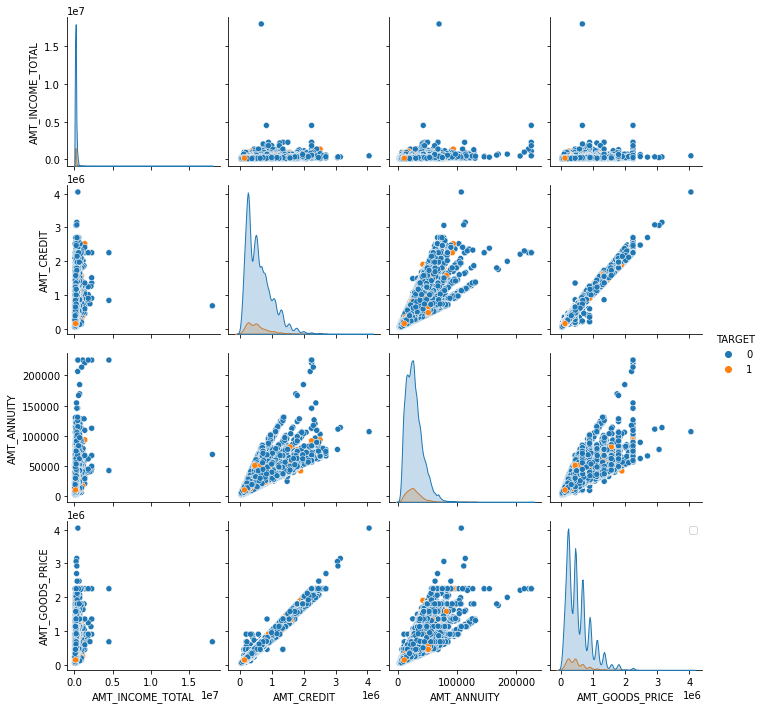

In [113]:
amt = application_data[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE',"TARGET"]]

#as data is very large, it takes lots of resources and time to plot, so we sample 20% of the data to plot
sns.pairplot(amt.sample(frac = 0.2),hue="TARGET")

plt.legend()
plt.show()

**Inference:**  
1. Goods price is directly proportional to credit amount and loan annuity. As price of the goods increases, credit amount and loan annuity also increases.
2. Loan annuity, and credit amount is similarly related to income 

### REGION_POPULATION_RELATIVE
Normalized population of region where client lives (higher number means the client lives in more populated region

In [114]:
application_data.REGION_POPULATION_RELATIVE.describe()

count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64

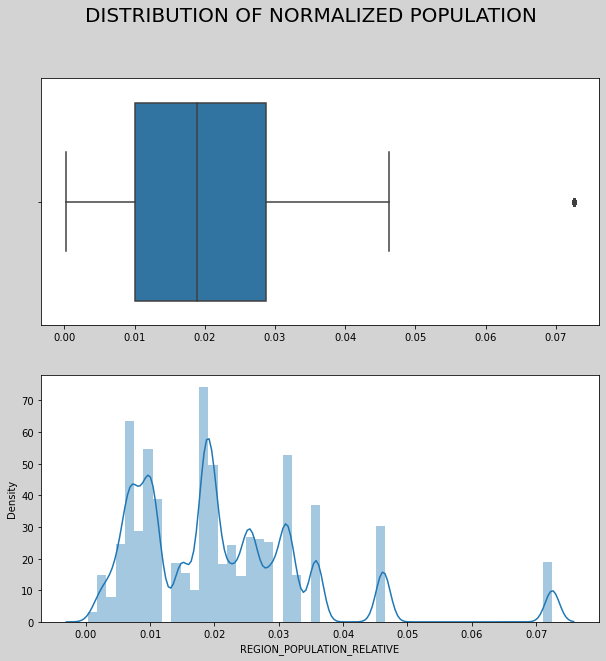

In [115]:
plt.figure(figsize = (10,10), facecolor='lightgrey')
plt.subplot(2,1,1)
sns.boxplot(data = application_data, x = 'REGION_POPULATION_RELATIVE')
plt.xlabel('')

plt.subplot(2,1,2)
sns.distplot(application_data.REGION_POPULATION_RELATIVE)
plt.suptitle('DISTRIBUTION OF NORMALIZED POPULATION', fontsize = 20)
plt.show()

In [116]:
#length of the outliers
len(detect_outlier(application_data['REGION_POPULATION_RELATIVE']))

8412

**Inference:**  
1. This column is an outlier because there are 8412 data points outside the upperbound of boxplot
2. The population is scattered in different points

### Age of the Employee
DAYS_BIRTH - Client's age in days at the time of application

In [117]:
application_data.DAYS_BIRTH.describe()

count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

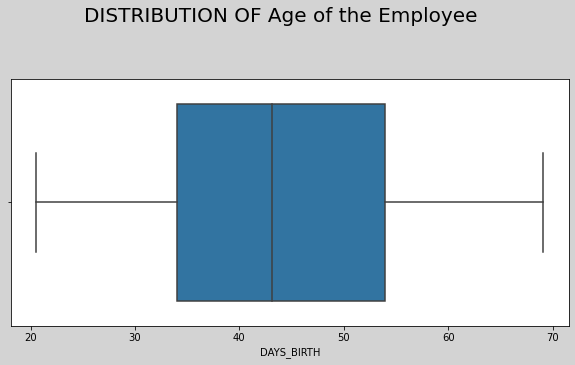

In [118]:
plt.figure(figsize = (10,10), facecolor='lightgrey')
plt.subplot(2,1,1)
sns.boxplot(data = application_data, x = application_data.DAYS_BIRTH/365)
plt.suptitle('DISTRIBUTION OF Age of the Employee', fontsize = 20)
plt.show()

**Inference:** Most of the applicant's age lie between 35 and 55

### Age vs Target

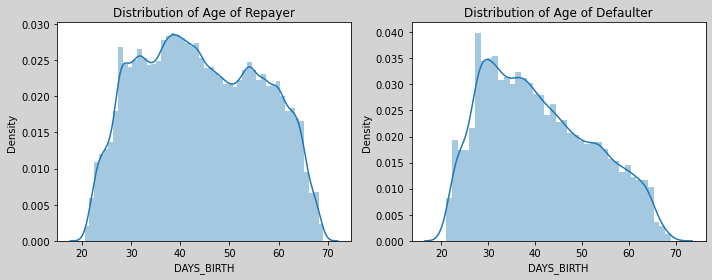

In [119]:
plt.figure(figsize=(10,4), facecolor='lightgrey')
plt.subplot(121)
sns.distplot(application_data_0.DAYS_BIRTH/365)
plt.title('Distribution of Age of Repayer')

plt.subplot(122)
sns.distplot(application_data_1.DAYS_BIRTH/365)
plt.title('Distribution of Age of Defaulter')
plt.tight_layout()
plt.show()

**Inference:**   Most of the defaulters age lie around 30

### Number of days Employed
DAYS_EMPLOYED

In [120]:
application_data.DAYS_EMPLOYED.describe()

count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

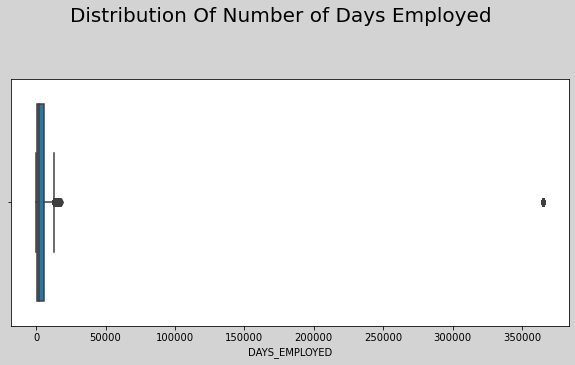

In [121]:
plt.figure(figsize = (10,10), facecolor='lightgrey')
plt.subplot(2,1,1)
sns.boxplot(data = application_data, x = 'DAYS_EMPLOYED')
plt.suptitle('Distribution Of Number of Days Employed', fontsize = 20)
plt.show()

In [122]:
#length of the outliers
len(detect_outlier(application_data['DAYS_EMPLOYED']))

56357

**Inference**: There are total 56357 outliers in the DAYS_EMPLOYED column because most of them lie outside the upperbound of the boxplot

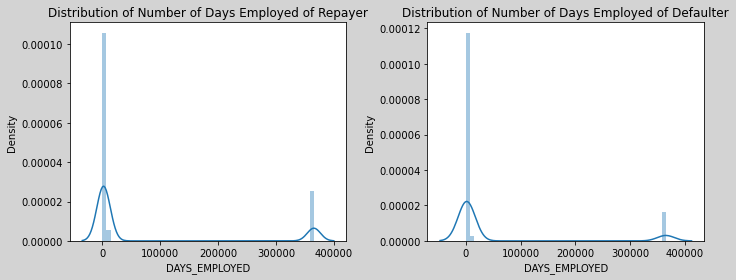

In [123]:
plt.figure(figsize=(10,4), facecolor='lightgrey')
plt.subplot(121)
sns.distplot(application_data_0.DAYS_EMPLOYED, bins =50)
plt.title('Distribution of Number of Days Employed of Repayer')

plt.subplot(122)
sns.distplot(application_data_1.DAYS_EMPLOYED, bins = 50)
plt.title('Distribution of Number of Days Employed of Defaulter')
plt.tight_layout()
plt.show()

**Inference:** Repayer has the higher number of days employed than the defaulter

### Count of Family members
CNT_FAM_MEMBERS

In [124]:
application_data.CNT_FAM_MEMBERS.describe()

count    307511.000000
mean          2.152664
std           0.910679
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

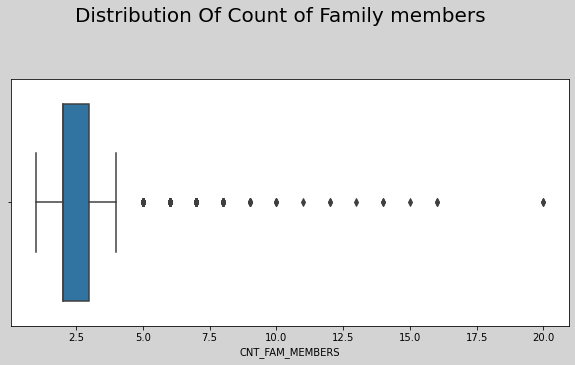

In [125]:
plt.figure(figsize = (10,10), facecolor='lightgrey')
plt.subplot(2,1,1)
sns.boxplot(data = application_data, x = 'CNT_FAM_MEMBERS')
plt.suptitle('Distribution Of Count of Family members', fontsize = 20)
plt.show()

In [126]:
#length of outliers
len(detect_outlier(application_data['CNT_FAM_MEMBERS']))

4007

**Inference:**  There are total 4007 outliers in this column as the these points lie outside the upperbound of boxplot

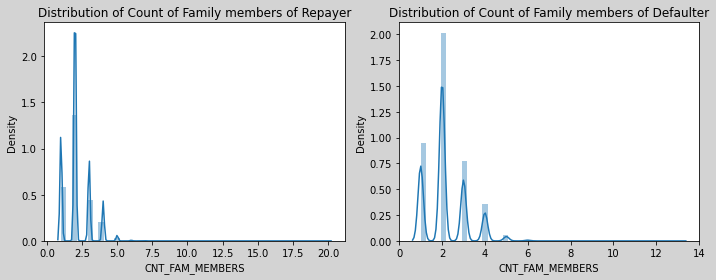

In [127]:
plt.figure(figsize=(10,4), facecolor='lightgrey')
plt.subplot(121)
sns.distplot(application_data_0.CNT_FAM_MEMBERS, bins =50)
plt.title('Distribution of Count of Family members of Repayer')

plt.subplot(122)
sns.distplot(application_data_1.CNT_FAM_MEMBERS, bins = 50)
plt.title('Distribution of Count of Family members of Defaulter')
plt.tight_layout()
plt.show()

**Inference:** Count of Family members of Repayer is higher than defaulters'

In [128]:
application_data[num_col].head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,202500.0,406597.5,24700.5,351000.0,0.018801,9461,637,3648.0,2120,1.0,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,1188,1186.0,291,2.0,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,67500.0,135000.0,6750.0,135000.0,0.010032,19046,225,4260.0,2531,1.0,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,135000.0,312682.5,29686.5,297000.0,0.008019,19005,3039,9833.0,2437,2.0,2.0,0.0,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,121500.0,513000.0,21865.5,513000.0,0.028663,19932,3038,4311.0,3458,1.0,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0


### Distribution client's social surroundings with observed and defaulted 30 DPD (days past due)

OBS_30_CNT_SOCIAL_CIRCLE- How many observation of client's social surroundings with observable 30 DPD (days past due) default.

DEF_30_CNT_SOCIAL_CIRCLE-How many observation of client's social surroundings defaulted on 30 DPD (days past due) .

OBS_60_CNT_SOCIAL_CIRCLE - How many observation of client's social surroundings with observable 60 DPD (days past due) default.

DEF_60_CNT_SOCIAL_CIRCLE - How many observation of client's social surroundings defaulted on 60 (days past due) DPD.

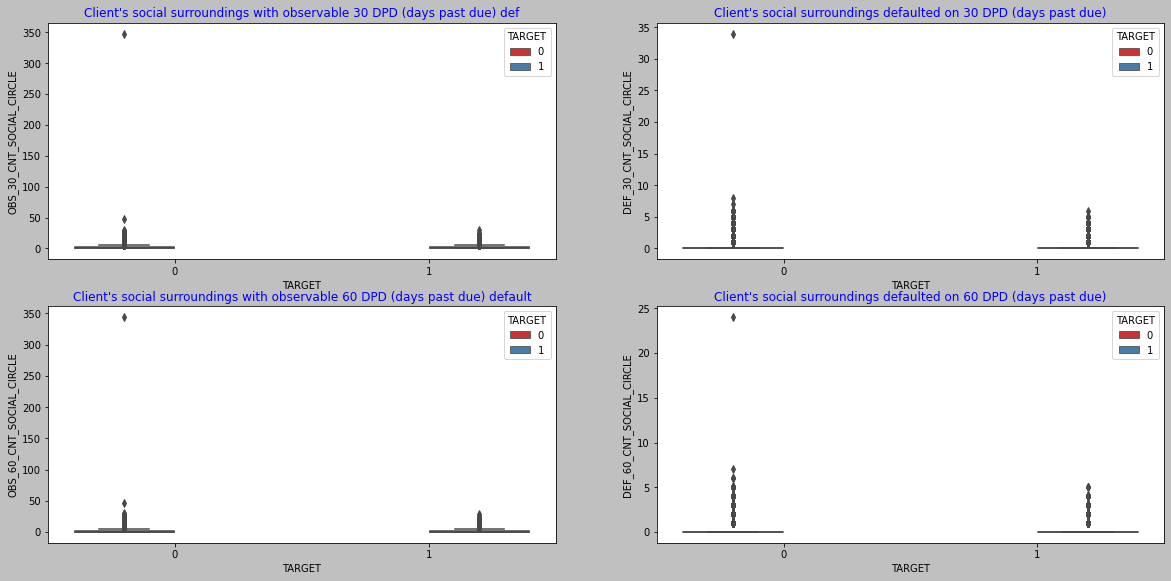

In [129]:
fig = plt.figure(figsize=(20,20))
plt.subplot(421)
sns.boxplot(data=application_data,x='TARGET',y='OBS_30_CNT_SOCIAL_CIRCLE',
            hue="TARGET", palette="Set1")
plt.title("Client's social surroundings with observable 30 DPD (days past due) def",color="b")
plt.subplot(422)
sns.boxplot(data=application_data,x='TARGET',y='DEF_30_CNT_SOCIAL_CIRCLE',
            hue="TARGET", palette="Set1")
plt.title("Client's social surroundings defaulted on 30 DPD (days past due)",color="b")
plt.subplot(423)
sns.boxplot(data=application_data,x='TARGET',y='OBS_60_CNT_SOCIAL_CIRCLE',
            hue="TARGET", palette="Set1")
plt.title("Client's social surroundings with observable 60 DPD (days past due) default",color="b")
plt.subplot(424)
sns.boxplot(data=application_data,x='TARGET',y='DEF_60_CNT_SOCIAL_CIRCLE',
            hue="TARGET", palette="Set1")
plt.title("Client's social surroundings defaulted on 60 DPD (days past due)",color="b")
fig.set_facecolor("silver")

In [130]:
print('OBS_30_CNT_SOCIAL_CIRCLE column has ',len(detect_outlier(application_data.OBS_30_CNT_SOCIAL_CIRCLE)),' outliers')
print('OBS_60_CNT_SOCIAL_CIRCLE column has ',len(detect_outlier(application_data.OBS_60_CNT_SOCIAL_CIRCLE)),' outliers')
print('DEF_30_CNT_SOCIAL_CIRCLE column has ',len(detect_outlier(application_data.DEF_30_CNT_SOCIAL_CIRCLE)),' outliers')
print('DEF_60_CNT_SOCIAL_CIRCLE column has ',len(detect_outlier(application_data.DEF_60_CNT_SOCIAL_CIRCLE)),' outliers')

OBS_30_CNT_SOCIAL_CIRCLE column has  29524  outliers
OBS_60_CNT_SOCIAL_CIRCLE column has  29027  outliers
DEF_30_CNT_SOCIAL_CIRCLE column has  307511  outliers
DEF_60_CNT_SOCIAL_CIRCLE column has  307511  outliers


**Inference:**
1. OBS_30_CNT_SOCIAL_CIRCLE column has  29524  outliers
2. OBS_60_CNT_SOCIAL_CIRCLE column has  29027  outliers
3. DEF_30_CNT_SOCIAL_CIRCLE column has  307511  outliers
4. DEF_60_CNT_SOCIAL_CIRCLE column has  307511  outliers

### DAYS_LAST_PHONE_CHANGE
How many days before application did client change phone

In [131]:
application_data.DAYS_LAST_PHONE_CHANGE.describe()

count    307511.000000
mean        962.858119
std         826.807226
min           0.000000
25%         274.000000
50%         757.000000
75%        1570.000000
max        4292.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

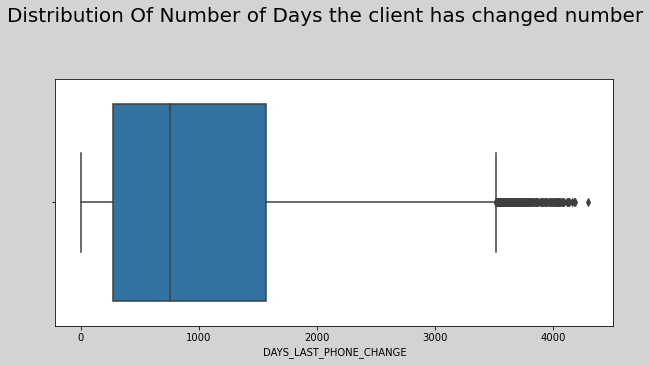

In [132]:
plt.figure(figsize = (10,10), facecolor='lightgrey')
plt.subplot(2,1,1)
sns.boxplot(data = application_data, x = 'DAYS_LAST_PHONE_CHANGE')
plt.suptitle('Distribution Of Number of Days the client has changed number', fontsize = 20)
plt.show()

In [133]:
#len of the outliers
len(detect_outlier(application_data['DAYS_LAST_PHONE_CHANGE']))

436

**Inference:** There are total 436 outliers in this columns as these points lie outside upperbound of boxplot

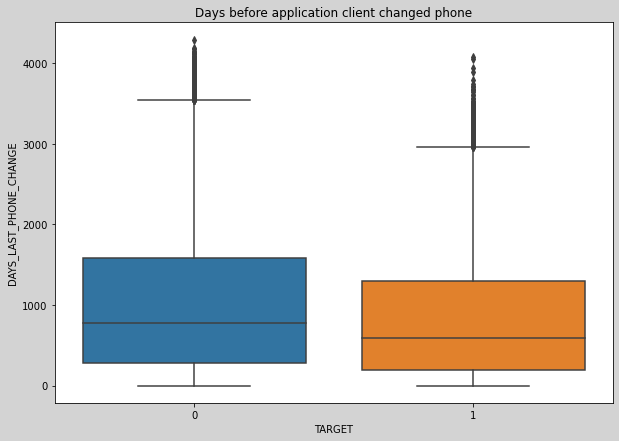

In [134]:
plt.figure(figsize=(10,7), facecolor='lightgrey')
sns.boxplot(application_data.TARGET, application_data.DAYS_LAST_PHONE_CHANGE)
plt.title('Days before application client changed phone')
plt.show()

**Inference:** On average, number of days before Defaulters changes phone is less than the Repayers.

### Equiries to Credit Bureau about the client before application.

AMT_REQ_CREDIT_BUREAU_HOUR - Number of enquiries to Credit Bureau about the client one hour before application.

AMT_REQ_CREDIT_BUREAU_DAY - Number of enquiries to Credit Bureau about the client one day before application (excluding one hour before application).

AMT_REQ_CREDIT_BUREAU_WEEK - Number of enquiries to Credit Bureau about the client one week before application (excluding one day before application).

AMT_REQ_CREDIT_BUREAU_MON - Number of enquiries to Credit Bureau about the client one month before application (excluding one week before application).

AMT_REQ_CREDIT_BUREAU_QRT - Number of enquiries to Credit Bureau about the client 3 month before application (excluding one month before application).

AMT_REQ_CREDIT_BUREAU_YEAR - Number of enquiries to Credit Bureau about the client one day year (excluding last 3 months before application).

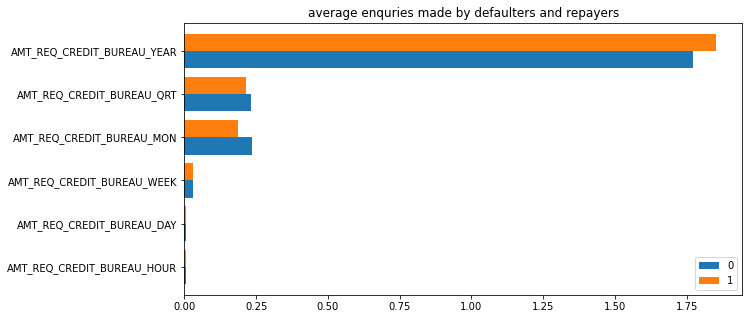

In [135]:
cols = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

application_data.groupby("TARGET")[cols].mean().transpose().plot(kind="barh",figsize=(10,5),width=.8)
plt.title("average enquries made by defaulters and repayers")
plt.legend(loc = 'lower right')
plt.show()

**Inference:**  Average number of enquiries to Credit Bureau about the client 1 year ago before application is maximum for  both non defaulters and defaulters

# Data analysis of Categorical and numerical Variables

### Amount columns vs Gender

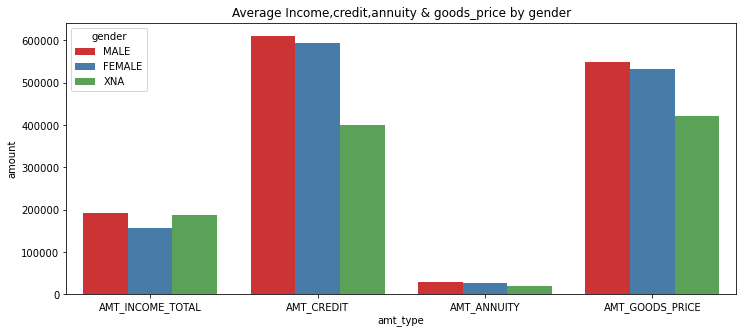

In [136]:
cols = [ 'AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']

df1 = application_data.groupby("CODE_GENDER")[cols].mean().transpose().reset_index()

df_f   = df1[["index","F"]]
df_f   = df_f.rename(columns={'index':"amt_type", 'F':"amount"})
df_f["gender"] = "FEMALE"
df_m   = df1[["index","M"]]
df_m   = df_m.rename(columns={'index':"amt_type", 'M':"amount"})
df_m["gender"] = "MALE"
df_xna = df1[["index","XNA"]]
df_xna = df_xna.rename(columns={'index':"amt_type", 'XNA':"amount"})
df_xna["gender"] = "XNA"

df_gen = pd.concat([df_m,df_f,df_xna],axis=0)

plt.figure(figsize=(12,5))
ax = sns.barplot("amt_type","amount",data=df_gen,hue="gender",palette="Set1")
plt.title("Average Income,credit,annuity & goods_price by gender")
plt.show()

**Inference**
1. Male clients have higher average income
2. Average credit is given higher to male clients
3. Average loan annuity is higher for male clients
4. Average price of goods is loaned by male clients are higher than female clients

### Average Earnings by different professions and education types

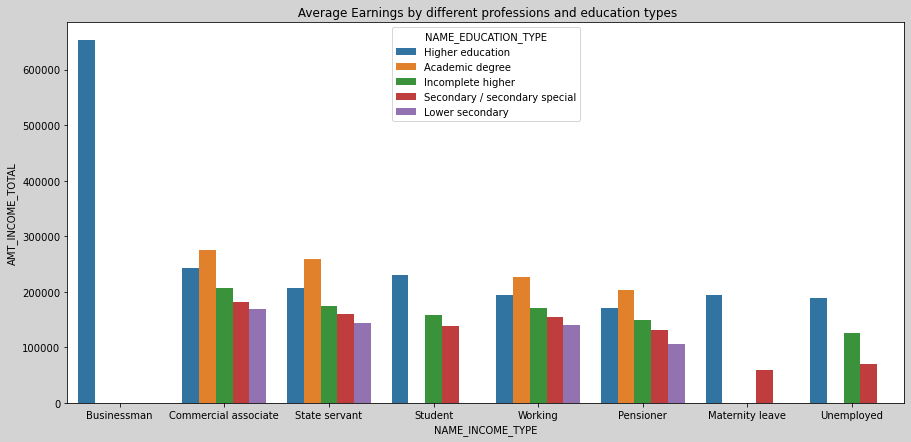

In [137]:
edu = application_data.groupby(['NAME_EDUCATION_TYPE','NAME_INCOME_TYPE'])['AMT_INCOME_TOTAL'].mean().reset_index().sort_values(by='AMT_INCOME_TOTAL',ascending=False)
fig = plt.figure(figsize=(15,7), facecolor= 'lightgrey')
ax = sns.barplot('NAME_INCOME_TYPE','AMT_INCOME_TOTAL',data=edu,hue='NAME_EDUCATION_TYPE')
plt.title(" Average Earnings by different professions and education types")

plt.show()

**Inference:**   
1. Businessman with higher education has the highest income.
2. After higher education those with academic degree has the highest salary

### CORRELATION

#### Top 10 Correlations for those who have payment difficulties

In [138]:
correlation_1 = application_data_1.corr().abs().unstack().sort_values().dropna()
correlation_1 = correlation_1[correlation_1 != 1.0]
correlation_1.sort_values(ascending = False).head(10)

OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.998270
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.998270
AMT_GOODS_PRICE              AMT_CREDIT                     0.982783
AMT_CREDIT                   AMT_GOODS_PRICE                0.982783
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.956637
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.956637
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.885484
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.885484
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE       0.869016
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE       0.869016
dtype: float64

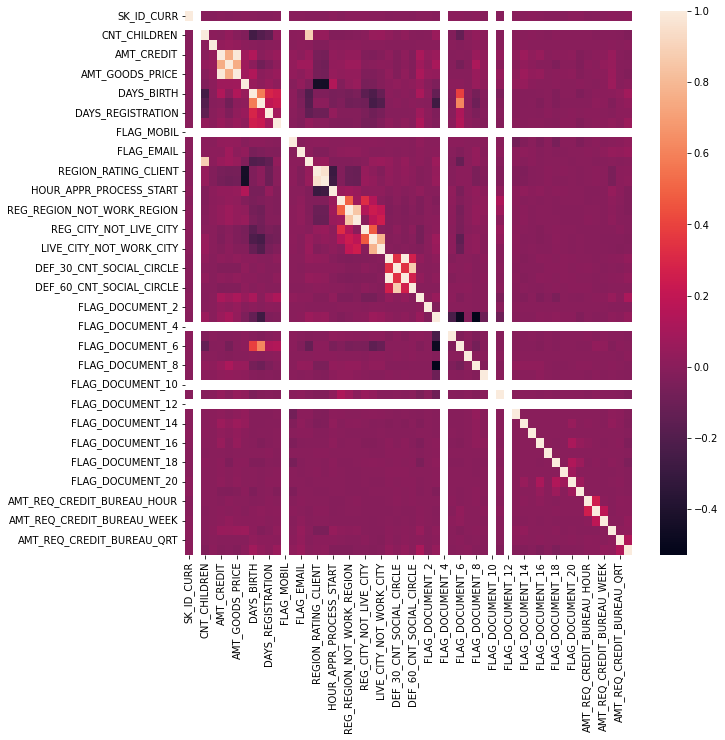

In [139]:
plt.figure(figsize = (10,10))
corr = application_data_1.corr()
sns.heatmap(corr)
plt.show()

**Inference:**  Number of observation of client's social surroundings with observable 30 DPD (days past due) default and that of 60 DPD has the highest correlation for the clients having payment difficulties

#### Top 10 Correlation Fields for those who make payments on time

In [140]:
correlation_0 = application_data_0.corr().abs().unstack().sort_values().dropna()
correlation_0 = correlation_0[correlation_0 != 1.0]
correlation_0.sort_values(ascending = False).head(10)

OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.998510
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.998510
AMT_GOODS_PRICE              AMT_CREDIT                     0.987022
AMT_CREDIT                   AMT_GOODS_PRICE                0.987022
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.950149
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.950149
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.878571
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.878571
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.861861
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION    0.861861
dtype: float64

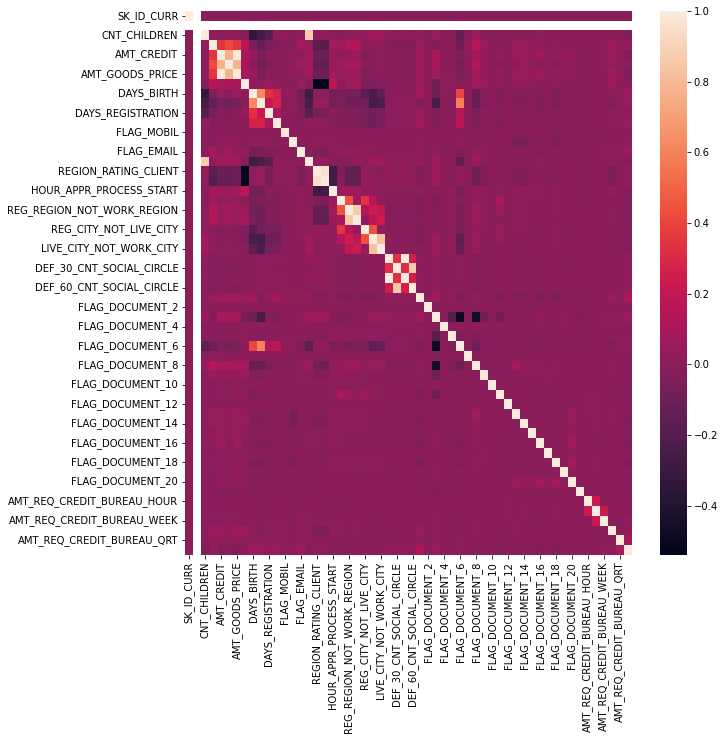

In [141]:
plt.figure(figsize = (10,10))
corr = application_data_0.corr()
sns.heatmap(corr)
plt.show()

**Inference:**  Number of observation of client's social surroundings with observable 30 DPD (days past due) default and that of 60 DPD has the highest correlation for the clients having no payment difficulties

# ANALYSIS OF PREVIOUS APPLICATION

### Inspecting the data

In [142]:
df = pd.read_csv('previous_application.csv')
df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [143]:
df.shape

(1670214, 37)

In [144]:
#columns information and their
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [145]:
#statistical info about the numberical columns
df.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


#### Dropping 50% of Null values

In [146]:
#check for percentage of null values
round((df.isnull().sum()/len(df)*100).sort_values(ascending = False),2)

RATE_INTEREST_PRIVILEGED       99.64
RATE_INTEREST_PRIMARY          99.64
AMT_DOWN_PAYMENT               53.64
RATE_DOWN_PAYMENT              53.64
NAME_TYPE_SUITE                49.12
NFLAG_INSURED_ON_APPROVAL      40.30
DAYS_TERMINATION               40.30
DAYS_LAST_DUE                  40.30
DAYS_LAST_DUE_1ST_VERSION      40.30
DAYS_FIRST_DUE                 40.30
DAYS_FIRST_DRAWING             40.30
AMT_GOODS_PRICE                23.08
AMT_ANNUITY                    22.29
CNT_PAYMENT                    22.29
PRODUCT_COMBINATION             0.02
AMT_CREDIT                      0.00
NAME_YIELD_GROUP                0.00
NAME_PORTFOLIO                  0.00
NAME_SELLER_INDUSTRY            0.00
SELLERPLACE_AREA                0.00
CHANNEL_TYPE                    0.00
NAME_PRODUCT_TYPE               0.00
SK_ID_PREV                      0.00
NAME_GOODS_CATEGORY             0.00
NAME_CLIENT_TYPE                0.00
CODE_REJECT_REASON              0.00
SK_ID_CURR                      0.00
D

In [147]:
#remove columns that have null values greater than 50% and store in new dataframe
previous_data = df.dropna(axis=1, thresh = len(df) * 0.5)

In [148]:
#check if columns having null values greater than 50% are removed or not
round((previous_data.isnull().sum()/len(previous_data)*100).sort_values(ascending = False),2).head(20)

NAME_TYPE_SUITE               49.12
DAYS_FIRST_DRAWING            40.30
DAYS_TERMINATION              40.30
DAYS_LAST_DUE                 40.30
DAYS_LAST_DUE_1ST_VERSION     40.30
DAYS_FIRST_DUE                40.30
NFLAG_INSURED_ON_APPROVAL     40.30
AMT_GOODS_PRICE               23.08
AMT_ANNUITY                   22.29
CNT_PAYMENT                   22.29
PRODUCT_COMBINATION            0.02
AMT_CREDIT                     0.00
WEEKDAY_APPR_PROCESS_START     0.00
HOUR_APPR_PROCESS_START        0.00
NAME_CONTRACT_TYPE             0.00
AMT_APPLICATION                0.00
NAME_YIELD_GROUP               0.00
NAME_SELLER_INDUSTRY           0.00
SELLERPLACE_AREA               0.00
CHANNEL_TYPE                   0.00
dtype: float64

In [149]:
#check shape
previous_data.shape

(1670214, 33)

In [150]:
#check for duplicate rows
previous_data.drop_duplicates(inplace = True)

In [151]:
#check shape
previous_data.shape

(1670214, 33)

**Inference:** No duplicate rows

### Handling missing values

In [152]:
previous_data.isnull().sum().sort_values(ascending = False).head(13)

NAME_TYPE_SUITE               820405
DAYS_FIRST_DRAWING            673065
DAYS_TERMINATION              673065
DAYS_LAST_DUE                 673065
DAYS_LAST_DUE_1ST_VERSION     673065
DAYS_FIRST_DUE                673065
NFLAG_INSURED_ON_APPROVAL     673065
AMT_GOODS_PRICE               385515
AMT_ANNUITY                   372235
CNT_PAYMENT                   372230
PRODUCT_COMBINATION              346
AMT_CREDIT                         1
WEEKDAY_APPR_PROCESS_START         0
dtype: int64

#### Handling NAME_TYPE_SUITE

In [153]:
#checking for number of unique values
previous_data.NAME_TYPE_SUITE.value_counts(dropna=False)

NaN                820405
Unaccompanied      508970
Family             213263
Spouse, partner     67069
Children            31566
Other_B             17624
Other_A              9077
Group of people      2240
Name: NAME_TYPE_SUITE, dtype: int64

As we have no data about who was accompanying the client during applying loan, we can replace the missing values with the word 'Missing'

In [154]:
#replcae NaN with 'Missing'
previous_data.NAME_TYPE_SUITE.fillna('Missing', inplace = True)

In [155]:
#recheck the imputation
previous_data.NAME_TYPE_SUITE.value_counts(dropna=False)

Missing            820405
Unaccompanied      508970
Family             213263
Spouse, partner     67069
Children            31566
Other_B             17624
Other_A              9077
Group of people      2240
Name: NAME_TYPE_SUITE, dtype: int64

#### Handling DAYS_FIRST_DRAWING, DAYS_TERMINATION ,DAYS_LAST_DUE ,DAYS_LAST_DUE_1ST_VERSION , DAYS_FIRST_DUE

In [156]:
days = previous_data[['DAYS_FIRST_DRAWING', 'DAYS_TERMINATION' ,'DAYS_LAST_DUE' ,'DAYS_LAST_DUE_1ST_VERSION' , 'DAYS_FIRST_DUE']]
days.head()

,DAYS_FIRST_DRAWING,DAYS_TERMINATION,DAYS_LAST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DUE
0,365243.0,-37.0,-42.0,300.0,-42.0
1,365243.0,365243.0,365243.0,916.0,-134.0
2,365243.0,365243.0,365243.0,59.0,-271.0
3,365243.0,-177.0,-182.0,-152.0,-482.0
4,NaN,NaN,NaN,NaN,NaN


In [157]:
days.describe()

,DAYS_FIRST_DRAWING,DAYS_TERMINATION,DAYS_LAST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DUE
count,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,342209.855039,81992.343838,76582.403064,33767.774054,13826.269337
std,88916.115834,153303.516729,149647.415123,106857.034789,72444.869708
min,-2922.000000,-2874.000000,-2889.000000,-2801.000000,-2892.000000
25%,365243.000000,-1270.000000,-1314.000000,-1242.000000,-1628.000000
50%,365243.000000,-499.000000,-537.000000,-361.000000,-831.000000
75%,365243.000000,-44.000000,-74.000000,129.000000,-411.000000
max,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000


To avoid outliers, we replace the missing values with median

In [158]:
#impute NaNs with the missing values
for i in list(days.columns):
    previous_data[i].fillna(previous_data[i].median(), inplace = True)

In [159]:
#check for the imputation
previous_data[['DAYS_FIRST_DRAWING', 'DAYS_TERMINATION' ,'DAYS_LAST_DUE' ,'DAYS_LAST_DUE_1ST_VERSION' , 'DAYS_FIRST_DUE']].isnull().sum()

DAYS_FIRST_DRAWING           0
DAYS_TERMINATION             0
DAYS_LAST_DUE                0
DAYS_LAST_DUE_1ST_VERSION    0
DAYS_FIRST_DUE               0
dtype: int64

### Handling NFLAG_INSURED_ON_APPROVAL

In [160]:
#inspect the column
previous_data.NFLAG_INSURED_ON_APPROVAL.value_counts(dropna=False, normalize = True)

NaN    0.402981
0.0    0.398468
1.0    0.198551
Name: NFLAG_INSURED_ON_APPROVAL, dtype: float64

As number of null values is higher than other labels, it is better to impute with the keyword 'NA'

In [161]:
#impute NaN with 'NA'
previous_data.NFLAG_INSURED_ON_APPROVAL.fillna('NA', inplace = True)

In [162]:
#rechecl imputation
previous_data.NFLAG_INSURED_ON_APPROVAL.isnull().sum()

0

### Handling AMT_GOODS_PRICE, AMT_ANNUITY, AMT_CREDIT and CNT_PAYMENT

In [163]:
#combinw the required columns
num = previous_data[['AMT_GOODS_PRICE', 'AMT_ANNUITY' ,'AMT_CREDIT' ,'CNT_PAYMENT']]
num.head()

,AMT_GOODS_PRICE,AMT_ANNUITY,AMT_CREDIT,CNT_PAYMENT
0,17145.0,1730.430,17145.0,12.0
1,607500.0,25188.615,679671.0,36.0
2,112500.0,15060.735,136444.5,12.0
3,450000.0,47041.335,470790.0,12.0
4,337500.0,31924.395,404055.0,24.0


In [164]:
#check statistical infos about the columns
num.describe()

,AMT_GOODS_PRICE,AMT_ANNUITY,AMT_CREDIT,CNT_PAYMENT
count,1.284699e+06,1.297979e+06,1.670213e+06,1.297984e+06
mean,2.278473e+05,1.595512e+04,1.961140e+05,1.605408e+01
std,3.153966e+05,1.478214e+04,3.185746e+05,1.456729e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.084100e+04,6.321780e+03,2.416050e+04,6.000000e+00
50%,1.123200e+05,1.125000e+04,8.054100e+04,1.200000e+01
75%,2.340000e+05,2.065842e+04,2.164185e+05,2.400000e+01
max,6.905160e+06,4.180581e+05,6.905160e+06,8.400000e+01


To avoid outliers, we impute the missing values with median

In [165]:
#imputation with median
for i in list(num.columns):
    previous_data[i].fillna(previous_data[i].median(), inplace = True)

In [166]:
#recheck for imputation
previous_data[['AMT_GOODS_PRICE', 'AMT_ANNUITY' ,'AMT_CREDIT' ,'CNT_PAYMENT']].isnull().sum()

AMT_GOODS_PRICE    0
AMT_ANNUITY        0
AMT_CREDIT         0
CNT_PAYMENT        0
dtype: int64

#### Handling PRODUCT_COMBINATION

In [167]:
#inspecting the column
previous_data.PRODUCT_COMBINATION.describe()

count     1669868
unique         17
top          Cash
freq       285990
Name: PRODUCT_COMBINATION, dtype: object

In [168]:
#check for unique values
previous_data.PRODUCT_COMBINATION.value_counts(dropna = False, normalize = True)

Cash                              0.171230
POS household with interest       0.157837
POS mobile with interest          0.132121
Cash X-Sell: middle               0.086146
Cash X-Sell: low                  0.077983
Card Street                       0.067406
POS industry with interest        0.059174
POS household without interest    0.049639
Card X-Sell                       0.048247
Cash Street: high                 0.035707
Cash X-Sell: high                 0.035505
Cash Street: middle               0.020751
Cash Street: low                  0.020257
POS mobile without interest       0.014419
POS other with interest           0.014297
POS industry without interest     0.007545
POS others without interest       0.001530
NaN                               0.000207
Name: PRODUCT_COMBINATION, dtype: float64

As number of null values is the least, it is safe to impute it with the mode.

In [169]:
#impute missnig values with the mode
previous_data.PRODUCT_COMBINATION.fillna(previous_data.PRODUCT_COMBINATION.mode()[0], inplace = True)

In [170]:
#recheck for imputation
previous_data.PRODUCT_COMBINATION.isnull().sum()

0

In [171]:
#check for null values in whole dataset
previous_data.isnull().sum().sum()

0

# DATA ANALYSIS OF CATEGORICAL VARIABLES

### Distribution  of  previous loan ids

In [172]:
id = previous_data.groupby("SK_ID_CURR")[["SK_ID_PREV"]].count()
id.head()

,SK_ID_PREV
SK_ID_CURR,
100001,1
100002,1
100003,3
100004,1
100005,2


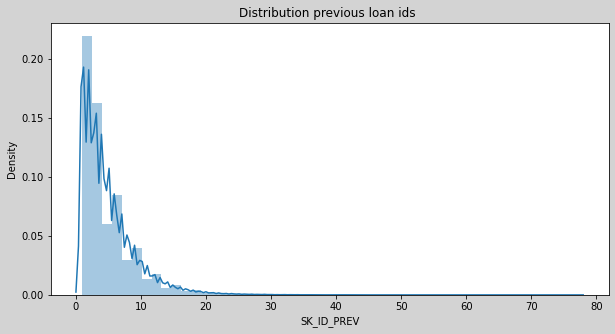

In [173]:
plt.figure(figsize = (10,5), facecolor='lightgrey')
sns.distplot(id["SK_ID_PREV"])
plt.title('Distribution previous loan ids ')
plt.show()

**Inference:** On average, current loan ids have 3 to 5 previous loans.

### Distribution of types of loans of previous_data

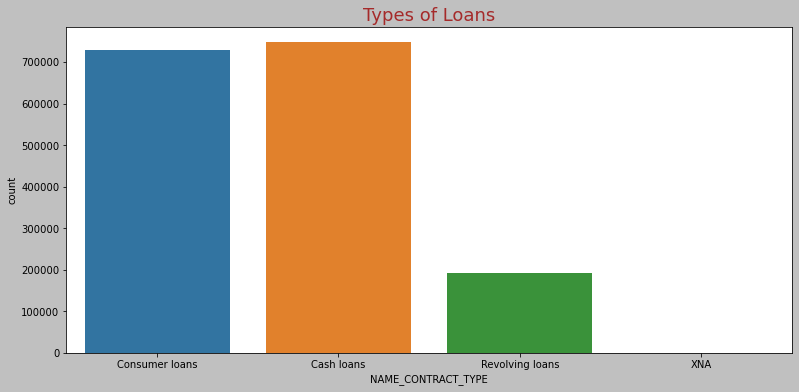

In [174]:
plt.figure(figsize=(13,6), facecolor = 'silver')
ax = sns.countplot(data = previous_data, x = 'NAME_CONTRACT_TYPE')
plt.title('Types of Loans', fontdict= {'fontsize': 18, 'fontweight' : 10, 'color' : 'Brown'})
plt.show()

**Inference:**  Cash loans and consumer loans are prefered by the clients than revolving loans

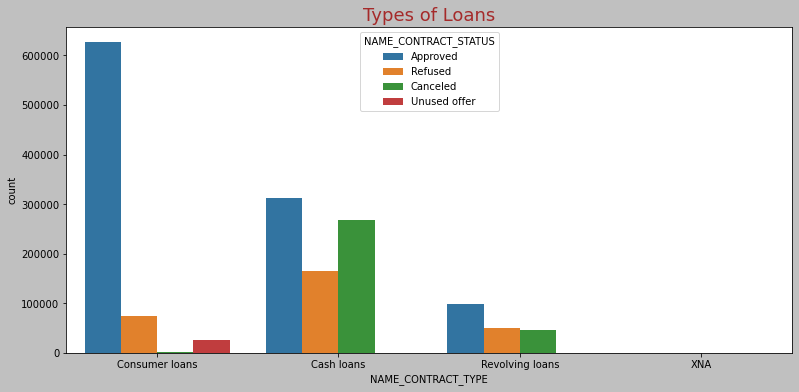

In [175]:
plt.figure(figsize=(13,6), facecolor = 'silver')
ax = sns.countplot(data = previous_data, x = 'NAME_CONTRACT_TYPE', hue = 'NAME_CONTRACT_STATUS')
plt.title('Types of Loans', fontdict= {'fontsize': 18, 'fontweight' : 10, 'color' : 'Brown'})
plt.show()

**Inference:** Number of approved cash loans is lower than consumer loans, even if cash loans are the highest

### Distribution of types of payments

In [176]:
previous_data.NAME_PAYMENT_TYPE.value_counts(normalize = True)

Cash through the bank                        0.618814
XNA                                          0.375631
Non-cash from your account                   0.004905
Cashless from the account of the employer    0.000650
Name: NAME_PAYMENT_TYPE, dtype: float64

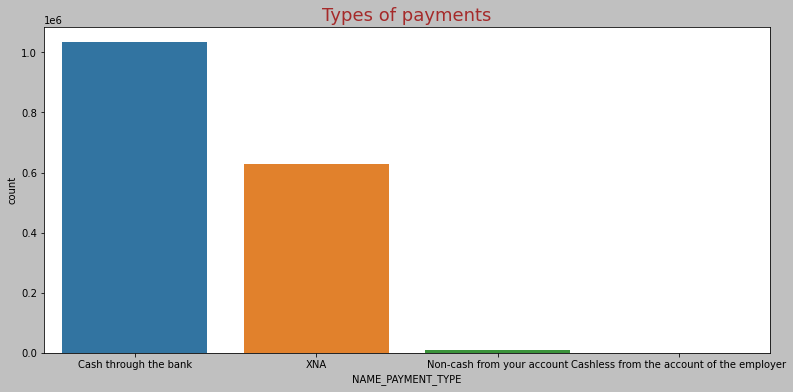

In [177]:
plt.figure(figsize=(13,6), facecolor = 'silver')
ax = sns.countplot(data = previous_data, x = 'NAME_PAYMENT_TYPE')
plt.title('Types of payments', fontdict= {'fontsize': 18, 'fontweight' : 10, 'color' : 'Brown'})
plt.show()

**Inference:** Major mode of payment is cash through the bank

### WEEKDAY_APPR_PROCESS_START	
On which day of the week did the client apply for previous application

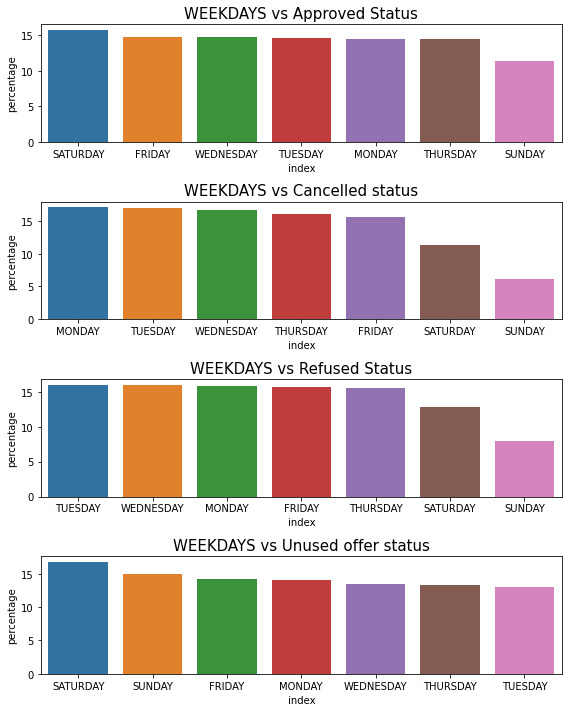

In [178]:
plt.figure(figsize = (8,10))
plt.subplot(4,1,1)
week = previous_data[previous_data['NAME_CONTRACT_STATUS']=='Approved']["WEEKDAY_APPR_PROCESS_START"].value_counts().reset_index()
week["percentage"] = round(week["WEEKDAY_APPR_PROCESS_START"]*100/week["WEEKDAY_APPR_PROCESS_START"].sum(),2)
sns.barplot(data=week, x= 'index', y = 'percentage')
plt.title('WEEKDAYS vs Approved Status', fontsize = 15)

plt.subplot(4,1,2)
week = previous_data[previous_data['NAME_CONTRACT_STATUS']=='Canceled']["WEEKDAY_APPR_PROCESS_START"].value_counts().reset_index()
week["percentage"] = round(week["WEEKDAY_APPR_PROCESS_START"]*100/week["WEEKDAY_APPR_PROCESS_START"].sum(),2)
sns.barplot(data=week, x= 'index', y = 'percentage')
plt.title('WEEKDAYS vs Cancelled status', fontsize = 15)

plt.subplot(4,1,3)
week = previous_data[previous_data['NAME_CONTRACT_STATUS']=='Refused']["WEEKDAY_APPR_PROCESS_START"].value_counts().reset_index()
week["percentage"] = round(week["WEEKDAY_APPR_PROCESS_START"]*100/week["WEEKDAY_APPR_PROCESS_START"].sum(),2)
sns.barplot(data=week, x= 'index', y = 'percentage')
plt.title('WEEKDAYS vs Refused Status', fontsize = 15)

plt.subplot(4,1,4)
week = previous_data[previous_data['NAME_CONTRACT_STATUS']=='Unused offer']["WEEKDAY_APPR_PROCESS_START"].value_counts().reset_index()
week["percentage"] = round(week["WEEKDAY_APPR_PROCESS_START"]*100/week["WEEKDAY_APPR_PROCESS_START"].sum(),2)
sns.barplot(data=week, x= 'index', y = 'percentage')
plt.title('WEEKDAYS vs Unused offer status', fontsize = 15)

plt.tight_layout()
plt.show()

**Inference**
1. Saturdays shows the highest number of approved loans
2. Number of loans cancelled by the clients is highest on Mondays
3. Tuesdays shows the highest number of refused loans by the company
4. Number of loans cancelled by the client on various stages of the process ishighest on Saturdays

### HOUR_APPR_PROCESS_START
Approximately at what day hour did the client apply for the previous application

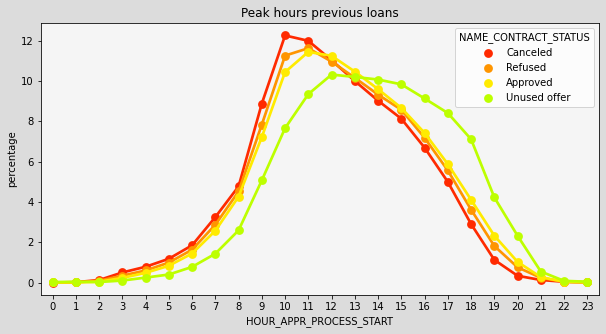

In [179]:
plt.figure(figsize = (10,5), facecolor='gainsboro')

hr = previous_data.groupby("NAME_CONTRACT_STATUS").agg({"HOUR_APPR_PROCESS_START":"value_counts"})
hr = hr.rename(columns={"HOUR_APPR_PROCESS_START":"value_counts"}).reset_index()
hr_0 = hr[hr["NAME_CONTRACT_STATUS"]=='Approved']
hr_1 = hr[hr["NAME_CONTRACT_STATUS"]=='Canceled']
hr_2 = hr[hr["NAME_CONTRACT_STATUS"]=='Refused']
hr_3 = hr[hr["NAME_CONTRACT_STATUS"]=='Unused offer']
hr_0["percentage"] = hr_0["value_counts"]*100/hr_0["value_counts"].sum()
hr_1["percentage"] = hr_1["value_counts"]*100/hr_1["value_counts"].sum()
hr_2["percentage"] = hr_2["value_counts"]*100/hr_2["value_counts"].sum()
hr_3["percentage"] = hr_3["value_counts"]*100/hr_3["value_counts"].sum()

hrs = pd.concat([hr_0, hr_1, hr_2, hr_3],axis=0)
#hrs["NAME_CONTRACT_STATUS"] = hrs["NAME_CONTRACT_STATUS"].replace({1:"defaulters",0:"repayers"})
hrs = hrs.sort_values(by="HOUR_APPR_PROCESS_START",ascending=True)

ax = sns.pointplot("HOUR_APPR_PROCESS_START","percentage",
                    data=hrs,hue="NAME_CONTRACT_STATUS",palette="prism")
ax.set_facecolor('whitesmoke')
ax.set_title("Peak hours previous loans")
fig.set_facecolor("snow")

**Inference:** 
1. Percentage of refused is almost equal to that of approved.
2. Percentage of cancelled is highest among others
3. Peak hours of the previous loans is around 10-12 morning

### Cash Loan Purpose vs Loan Status

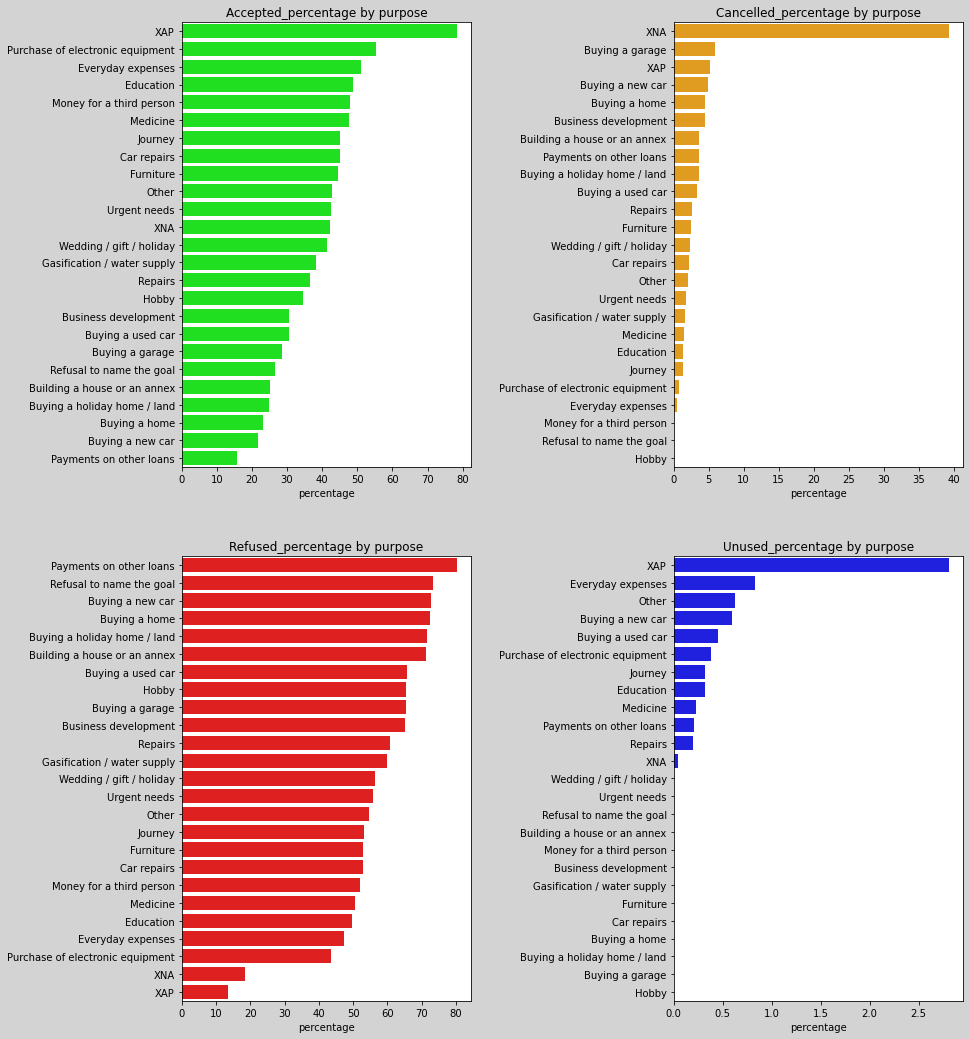

In [180]:
previous_data[["NAME_CASH_LOAN_PURPOSE","NAME_CONTRACT_STATUS"]]
purpose = pd.crosstab(previous_data["NAME_CASH_LOAN_PURPOSE"],previous_data["NAME_CONTRACT_STATUS"])
purpose["a"] = (purpose["Approved"]*100)/(purpose["Approved"]+purpose["Canceled"]+purpose["Refused"]+purpose["Unused offer"])
purpose["c"] = (purpose["Canceled"]*100)/(purpose["Approved"]+purpose["Canceled"]+purpose["Refused"]+purpose["Unused offer"])
purpose["r"] = (purpose["Refused"]*100)/(purpose["Approved"]+purpose["Canceled"]+purpose["Refused"]+purpose["Unused offer"])
purpose["u"] = (purpose["Unused offer"]*100)/(purpose["Approved"]+purpose["Canceled"]+purpose["Refused"]+purpose["Unused offer"])
purpose_new = purpose[["a","c","r","u"]]
purpose_new = purpose_new.stack().reset_index()
purpose_new["NAME_CONTRACT_STATUS"] = purpose_new["NAME_CONTRACT_STATUS"].replace({"a":"Accepted_percentage","c":"Cancelled_percentage",
                                                               "r":"Refused_percentage","u":"Unused_percentage"})

lst = purpose_new["NAME_CONTRACT_STATUS"].unique().tolist()
length = len(lst)
cs = ["lime","orange","r","b"]

fig = plt.figure(figsize=(14,18))
fig.set_facecolor("lightgrey")
for i,j,k in itertools.zip_longest(lst,range(length),cs):
    plt.subplot(2,2,j+1)
    dat = purpose_new[purpose_new["NAME_CONTRACT_STATUS"] == i]
    ax = sns.barplot(0,"NAME_CASH_LOAN_PURPOSE",data=dat.sort_values(by=0,ascending=False),color=k)
    plt.ylabel("")
    plt.xlabel("percentage")
    plt.title(i+" by purpose")
    plt.subplots_adjust(wspace = .7)


**Inference:**
1. Most loans are provided for XAP, or purchasing any electonic 
2. Highest number of refusal of loans is due to Payment os other loans

### CODE_REJECT_REASON Distribution

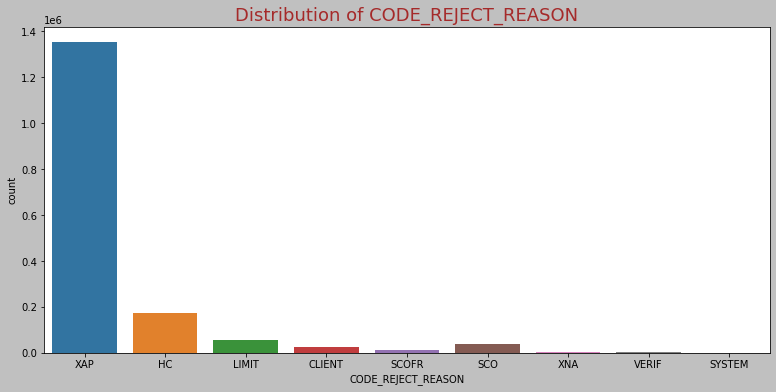

In [181]:
plt.figure(figsize=(13,6), facecolor = 'silver')
ax = sns.countplot(data = previous_data, x = 'CODE_REJECT_REASON')
plt.title('Distribution of CODE_REJECT_REASON', fontdict= {'fontsize': 18, 'fontweight' : 10, 'color' : 'Brown'})
plt.show()

**Inference:** Reason for rejection due XAP is the highest

### Distribution of type of people accompanying client in previous data

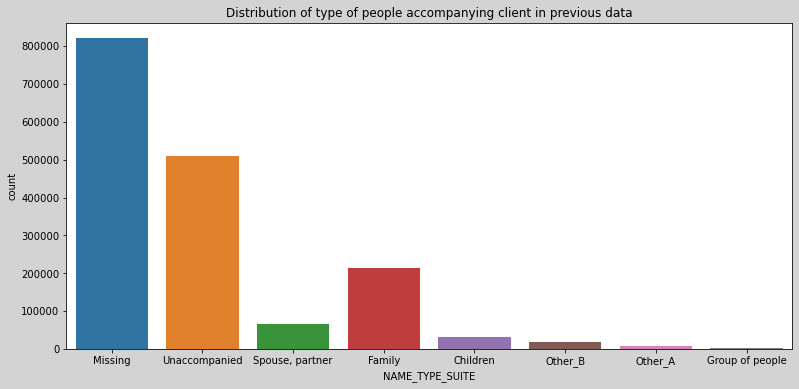

In [182]:
plt.figure(figsize = (13,6),facecolor='lightgrey')
sns.countplot(data = previous_data, x = previous_data.NAME_TYPE_SUITE)
plt.title('Distribution of type of people accompanying client in previous data')
plt.show()

**Inference**: 
1. Most of the clients were accompanied by no one during loan application process.
2. Major percentage of data about people accompanying client is missing

### Distribution of client type

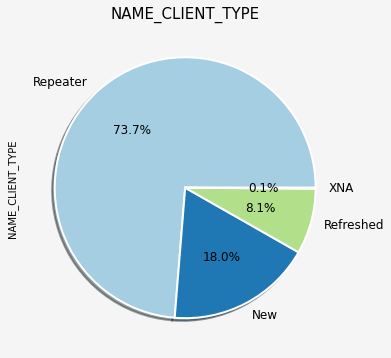

In [183]:
plt.figure(figsize = (6,6), facecolor='whitesmoke')
previous_data["NAME_CLIENT_TYPE"].value_counts().plot.pie(autopct = "%1.1f%%",fontsize=12,
                                                             colors = sns.color_palette("Paired"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)

plt.title("NAME_CLIENT_TYPE", fontsize = 15)
plt.show()

**Inferences** 73% of clients are old clients

### Goods categories

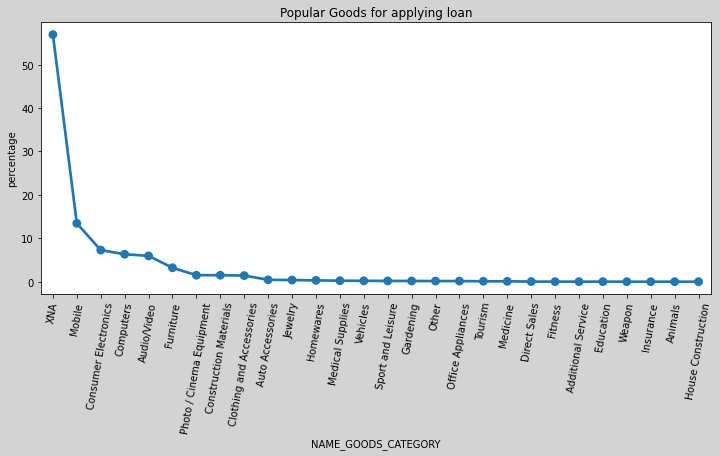

In [184]:
goods = previous_data["NAME_GOODS_CATEGORY"].value_counts().reset_index()
goods["percentage"] = round(goods["NAME_GOODS_CATEGORY"]*100/goods["NAME_GOODS_CATEGORY"].sum(),2)
fig = plt.figure(figsize=(12,5), facecolor='lightgrey')
ax = sns.pointplot("index","percentage",data=goods)
plt.xticks(rotation = 80)
plt.xlabel("NAME_GOODS_CATEGORY")
plt.ylabel("percentage")
plt.title("Popular Goods for applying loan")
plt.show()

**Inference** Mobile, Consumer Electronics are most popular goods for applyig loan

### Distribution of types of previous Application

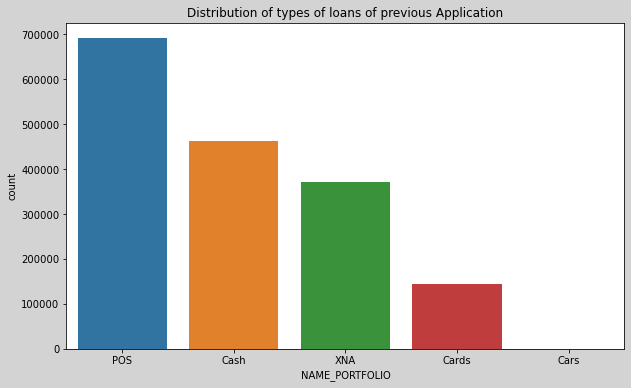

In [185]:
plt.figure(figsize = (10,6),facecolor='lightgrey')
sns.countplot(data = previous_data, x = previous_data.NAME_PORTFOLIO)
plt.title('Distribution of types of loans of previous Application')
plt.show()

**Inference:** POS type of Loans is highest after Cash Loans

### Channel types vs Loan Status

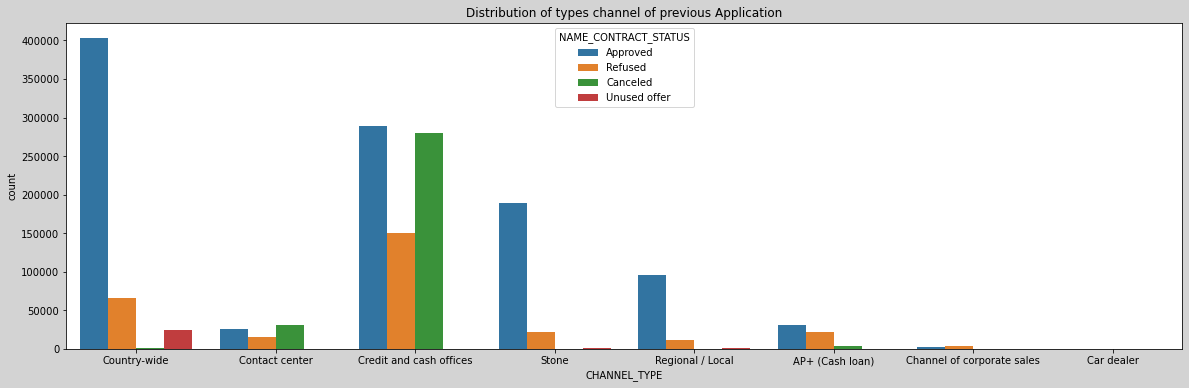

In [186]:
plt.figure(figsize = (20,6),facecolor='lightgrey')
sns.countplot(data = previous_data, x = previous_data.CHANNEL_TYPE, hue= 'NAME_CONTRACT_STATUS')
plt.title('Distribution of types channel of previous Application')
plt.show()

**Inference** 
1. Country-wide, Credit and cash offices and stone are the highest approved types channels
2. Credit and cash offices have the maximum refusal rate

# DATA ANALYSIS OF NUMERICAL VARIABLES

### DAYS_DECISION
Relative to current application when was the decision about previous application made

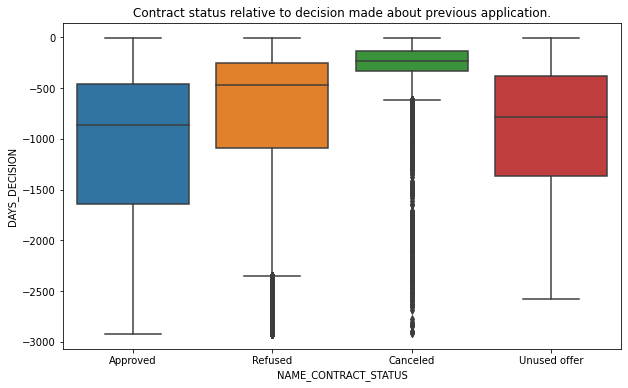

In [187]:
plt.figure(figsize=(10,6))
sns.boxplot(y= previous_data["DAYS_DECISION"],
               x = previous_data["NAME_CONTRACT_STATUS"])

plt.title("Contract status relative to decision made about previous application.")
plt.show()

**Inference**: Approved contract types have higher number of decision days

####  AMT_APPLICATION vs AMT_CREDIT vs AMT_ANNUITY vs AMT_GOODS_PRICE vs NAME_CONTRACT_STATUS

No handles with labels found to put in legend.


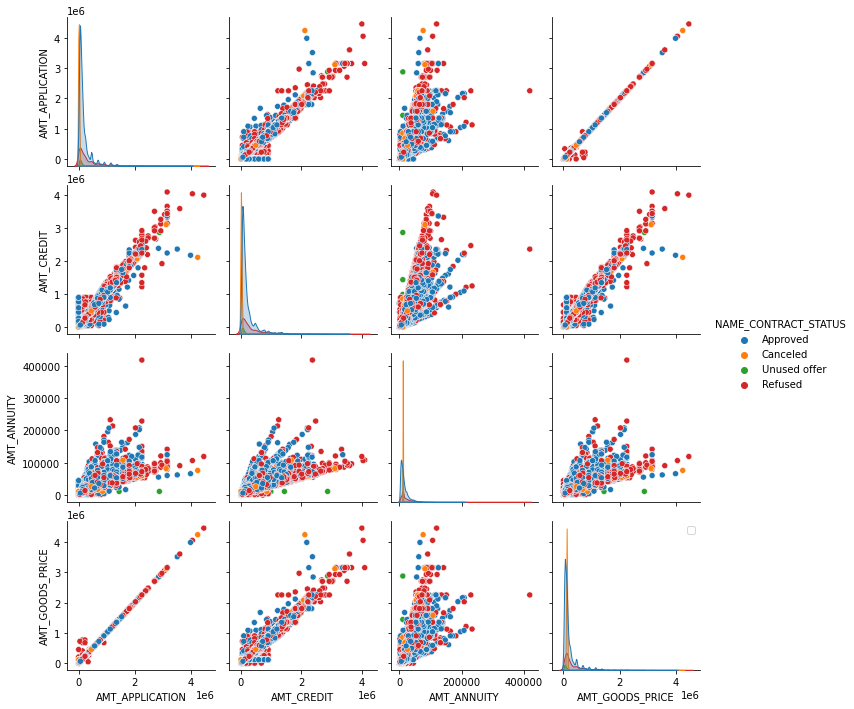

In [188]:
amt = previous_data[[ 'AMT_APPLICATION','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE',"NAME_CONTRACT_STATUS"]]

#as data is very large, it takes lots of resources and time to plot, so we sample 10% of the data to plot
sns.pairplot(amt.sample(frac = 0.1),hue="NAME_CONTRACT_STATUS")

plt.legend()
plt.show()

**Inference**: Almost all variables are directly proportional to each other

### Top 10 correlations in previous data

In [189]:
correlation = previous_data.corr().abs().unstack().sort_values().dropna()
correlation = correlation[correlation != 1.0]
correlation.sort_values(ascending = False).head(10)

AMT_GOODS_PRICE   AMT_APPLICATION     0.987143
AMT_APPLICATION   AMT_GOODS_PRICE     0.987143
AMT_CREDIT        AMT_APPLICATION     0.975824
AMT_APPLICATION   AMT_CREDIT          0.975824
AMT_GOODS_PRICE   AMT_CREDIT          0.971117
AMT_CREDIT        AMT_GOODS_PRICE     0.971117
DAYS_LAST_DUE     DAYS_TERMINATION    0.935149
DAYS_TERMINATION  DAYS_LAST_DUE       0.935149
AMT_GOODS_PRICE   AMT_ANNUITY         0.816293
AMT_ANNUITY       AMT_GOODS_PRICE     0.816293
dtype: float64

**Inference:**  
1. Goods Price, Amount of Credit client asked in previous loan has the highest correlation